# Investigating Energy Efficiency Across US States: A Bokeh Exploration

This notebook delves into the world of interactive data visualization with the Bokeh library. Using Open Data from the U.S. Energy Information Administration, we'll embark on a journey to explore energy efficiency programs across states. Our goal is twofold:

1.  **Understand Energy Efficiency Trends:** Analyze the effectiveness of the programs over a time period, visualizing patterns, and highlighting successes/areas for improvement.
2.  **Learn Bokeh:** Learn core concepts and features of this powerful library, progressing from simple visualizations to more complex and dynamic ones. 

Note that this notebook assumes you have basic familiarity with Python and its data manipulation libraries, such as Pandas and NumPy. 

Get ready to uncover insights into the nation's energy landscape while learning how to use the Bokeh visualization library!

**Here are hyperlinks if you want to go to the main sections!**
- [Visualization Library](#visualization-library)
- [Visualization Techniques](#visualization-techniques)
- [Demonstration](#demonstration)

## About the Data

The dataset we'll be exploring is sourced from the U.S. Energy Information Administration (EIA), which maintains an extensive open data repository accessible through their Application Programming Interface (API). This open data initiative is part of EIA's commitment to making energy data more accessible, understandable, relevant, and responsive to a wide audience. The API offers a variety of time-series datasets organized by major energy categories, allowing for detailed analysis and exploration.

### Accessing the Data

While the data can be accessed directly through the EIA's API (an API key is freely available to anyone who provides an email address), for the purposes of this analysis, the relevant data has been saved as a CSV file. This approach simplifies the data handling process, making it more accessible for our exploration. For those interested, the EIA's API documentation and access details can be found [here](https://www.eia.gov/opendata/documentation.php).

Additionally, geographical data for US states, essential for creating maps and spatial visualizations, can be found in the GeoJSON format [here](https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json).

### Dataset Overview

The dataset in focus encompasses costs and savings from energy efficiency programs by state and sector, sourced from Form EIA-861, specifically from the State Electricity Profiles, Table 13. It provides a comprehensive view of the financial and efficiency aspects of energy-saving initiatives across the US.

#### Columns Description:

- `chart`: Identifier for the data visualization.
- `period`: The time frame for the reported data.
- `state`: The state abbreviation code.
- `stateName`: Full name of the state.
- `timePeriod`: Specific time period of the reported data.
- `sector`: Sector identifier code.
- `sectorName`: Name of the sector (e.g., Residential, Commercial, Industrial, etc.).
- `all-other-costs`: Costs associated with energy efficiency programs outside of customer incentives.
- `customer-incentive`: Monetary incentives provided to customers to participate in energy-saving programs.
- `energy-savings`: The amount of energy saved as a result of efficiency programs, typically measured in kWh or MWh.
- `potential-peak-savings`: The potential peak energy savings achievable, often reflecting the maximum demand reduction.
- `all-other-costs-units`: Units for the `all-other-costs` column.
- `customer-incentive-units`: Units for the `customer-incentive` column.
- `energy-savings-units`: Units for the `energy-savings` column.
- `potential-peak-savings-units`: Units for the `potential-peak-savings` column.

This dataset provides a unique opportunity to analyze the impact of energy efficiency programs across different states and sectors, examining the interplay between costs, savings, and incentives.


<a id='visualization-library'></a>
# The Bokeh Library

As someone deeply interested in the vast landscape of Python libraries, I've been heard of Bokeh multiple times for its prowess in crafting interactive visualizations. Bokeh stands out as a open-source declarative library designed for modern web browsers, enabling the creation of dynamic, JavaScript-powered visualizations without the need for direct JavaScript coding. It has a strong community of contributers and users who have built many apps and more complex toolkits. Sponsored primarily by NumFOCUS (a non-profit organization) and with other several organizations such as Nvidia and Anaconda, the health and sustainability of the project is in good hands.

[Bokeh Documentation](https://docs.bokeh.org/en/latest/index.html)

[Bokeh Community Gallery](https://docs.bokeh.org/en/latest/docs/gallery.html)

[Bokeh Github](https://github.com/bokeh/bokeh)

Bokeh's ability to produce intricate graphics, from straightforward plots to comprehensive dashboards with real-time data feeds, makes it an invaluable tool in the data visualization toolkit. While Bokeh's primary domain is web development, its integration with Jupyter Notebooks through Bokeh servers (can be embedded) and potential for custom JavaScript callbacks (though we won't delve into custom JS in this project) provides a seamless bridge to the notebook environment, enabling rich, interactive experiences.

### Integration and Interactivity in Jupyter Notebooks

Despite its web-centric design, Bokeh's compatibility with Jupyter Notebooks is noteworthy. By embedding a Bokeh server within a notebook, we can unlock sophisticated Python-driven interactivity, quite similar to the functionality offered by IPython widgets—dropdowns, selects, sliders, and more—thereby enhancing the computational/analytical narrative without stepping outside the Python/Jupyter ecosystem.

### General Approach and Limitations

Bokeh's declarative approach offers flexibility at the cost of a steeper learning curve.  Instead of step-by-step instructions like in Matplotlib, you define the desired final appearance of your visualization using Bokeh's API. This grants you immense control over customization and interactivity.  However, understanding Bokeh's concepts may initially take more effort. Thankfully, excellent documentation and community tutorials make the learning process smoother.

## Why Bokeh? A Powerful Choice for Data Visualization

Bokeh stands out as a compelling choice in the Python visualization landscape. Here's why:

* **Interactivity that Engages:** Zooming, panning, hovering, and other interactive tools transform static plots into dynamic exploration experiences, fostering deeper insights.

* **Tailored Visual Narratives:** Bokeh's extensive customization options empower you to craft visualizations that are not only informative but also visually compelling.

* **Effortless Web Integration:** Easily embed Bokeh visualizations into web applications or share them as standalone HTML files, expanding the reach of your data-driven insights. Seamlessly adapt it to different devices thanks to responsive design.

* **Python Ecosystem Harmony:** Bokeh works hand-in-hand with the wider Python data science stack, streamlining your analytical workflow.

**My Background and Bokeh's Potential:**  My previous web development experience sparked my interest in Bokeh's powerful web integrations as it is JavaScript powered. I hope the skills gained while working with Bokeh in this project will open doors for future integrations into my future analytical web applications.

**In conclusion, Bokeh's blend of interactivity, customization, web-friendliness, and its synergistic relationship with the Python ecosystem make it for me a library that should be explored!**

## Installing the Bokeh Library

Here are the primary ways to install it:

**1. Using conda (if you have Anaconda/Miniconda):**

* **Open a terminal or command prompt.**
* **Type the following command and press Enter:**

   ```bash
   conda install bokeh
   ```

   Conda will automatically manage dependencies for you.

**2. Using pip:**

* **Open a terminal or command prompt.**
* **Type the following command and press Enter:**

   ```bash
   pip install bokeh
   ```

Note: Remember to answer yes to any prompts that might arise


In [117]:
# checking if the installation is sucessful by importing the main package and checking the version
import bokeh
bokeh.__version__

'3.3.4'

# Importing the Libraries

In [121]:
import requests
# for data manipulation 
import pandas as pd
import numpy as np
from itertools import product
# bokeh imports
# in and out functionality
from bokeh.io import show, output, curdoc, output_notebook
from bokeh.plotting import figure, output_notebook, show
# models to customize figures
from bokeh.models import GeoJSONDataSource, NumeralTickFormatter, LinearColorMapper, Range1d, HoverTool, ColorBar, ColumnDataSource, FactorRange, Legend
# customize layouts
from bokeh.layouts import row, column
# using inbuilt themes
from bokeh.themes import built_in_themes
# widgets
from bokeh.models.widgets import Slider, Select
# for coloring
from bokeh.palettes import brewer, RdYlBu, Viridis256, Category10
from bokeh.transform import factor_cmap
# for creating a bokeh server for embedding more interactive plots
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

output_notebook() 

Loading BokehJS ...

# Initial Exploration and Data Preparation

To begin our analysis, we'll first load and clean our dataset. This step is crucial to ensure the quality and reliability of our visualizations.

We'll look at the columns and select which columns we want t keep. Then we will clean the data by changing the data types of each column to its proper format as the response from the API everything is inferred as a string

## Loading the Data

We'll start by loading our dataset from a CSV file. This dataset contains energy savings data by state and sector from 2013 to 2022.

Notice that the overall 'US' is considered as a state, we can separate this from the other states if we are only interested in state aggregate statistics


In [154]:
### Importing from the the csv
df = pd.read_csv('state_energy_savings.csv')
# lets look at the first 3 rows to get an idea of what the data looks like
df.head(3)

,Unnamed: 0,period,state,stateName,timePeriod,sector,sectorName,all-other-costs,customer-incentive,energy-savings,potential-peak-savings,all-other-costs-units,customer-incentive-units,energy-savings-units,potential-peak-savings-units
0,0,2022,US,United States,Expected Life Cycle of Programs,RES,residential,1110656,1644822,113782935,2294.2,thousand dollars,thousand dollars,megawatthours,megawatts
1,1,2022,TX,Texas,Expected Life Cycle of Programs,RES,residential,16065,92413,6561078,120.2,thousand dollars,thousand dollars,megawatthours,megawatts
2,2,2022,TN,Tennessee,Expected Life Cycle of Programs,RES,residential,19938,1,120517,2.1,thousand dollars,thousand dollars,megawatthours,megawatts


### Using the API

If you are interested in how I compiled the CSV file from the API you can follow along this section.

If not continue on to the next section!

I determined the API request using the API Dashboard 

[Go to the API Dashboard here](https://www.eia.gov/opendata/browser/electricity/state-electricity-profiles/energy-efficiency)

Ensure the route is Electricty - State Specific Data - Cost and Savings from Energy Efficiency Programs

I selected all the columns and pressed submit
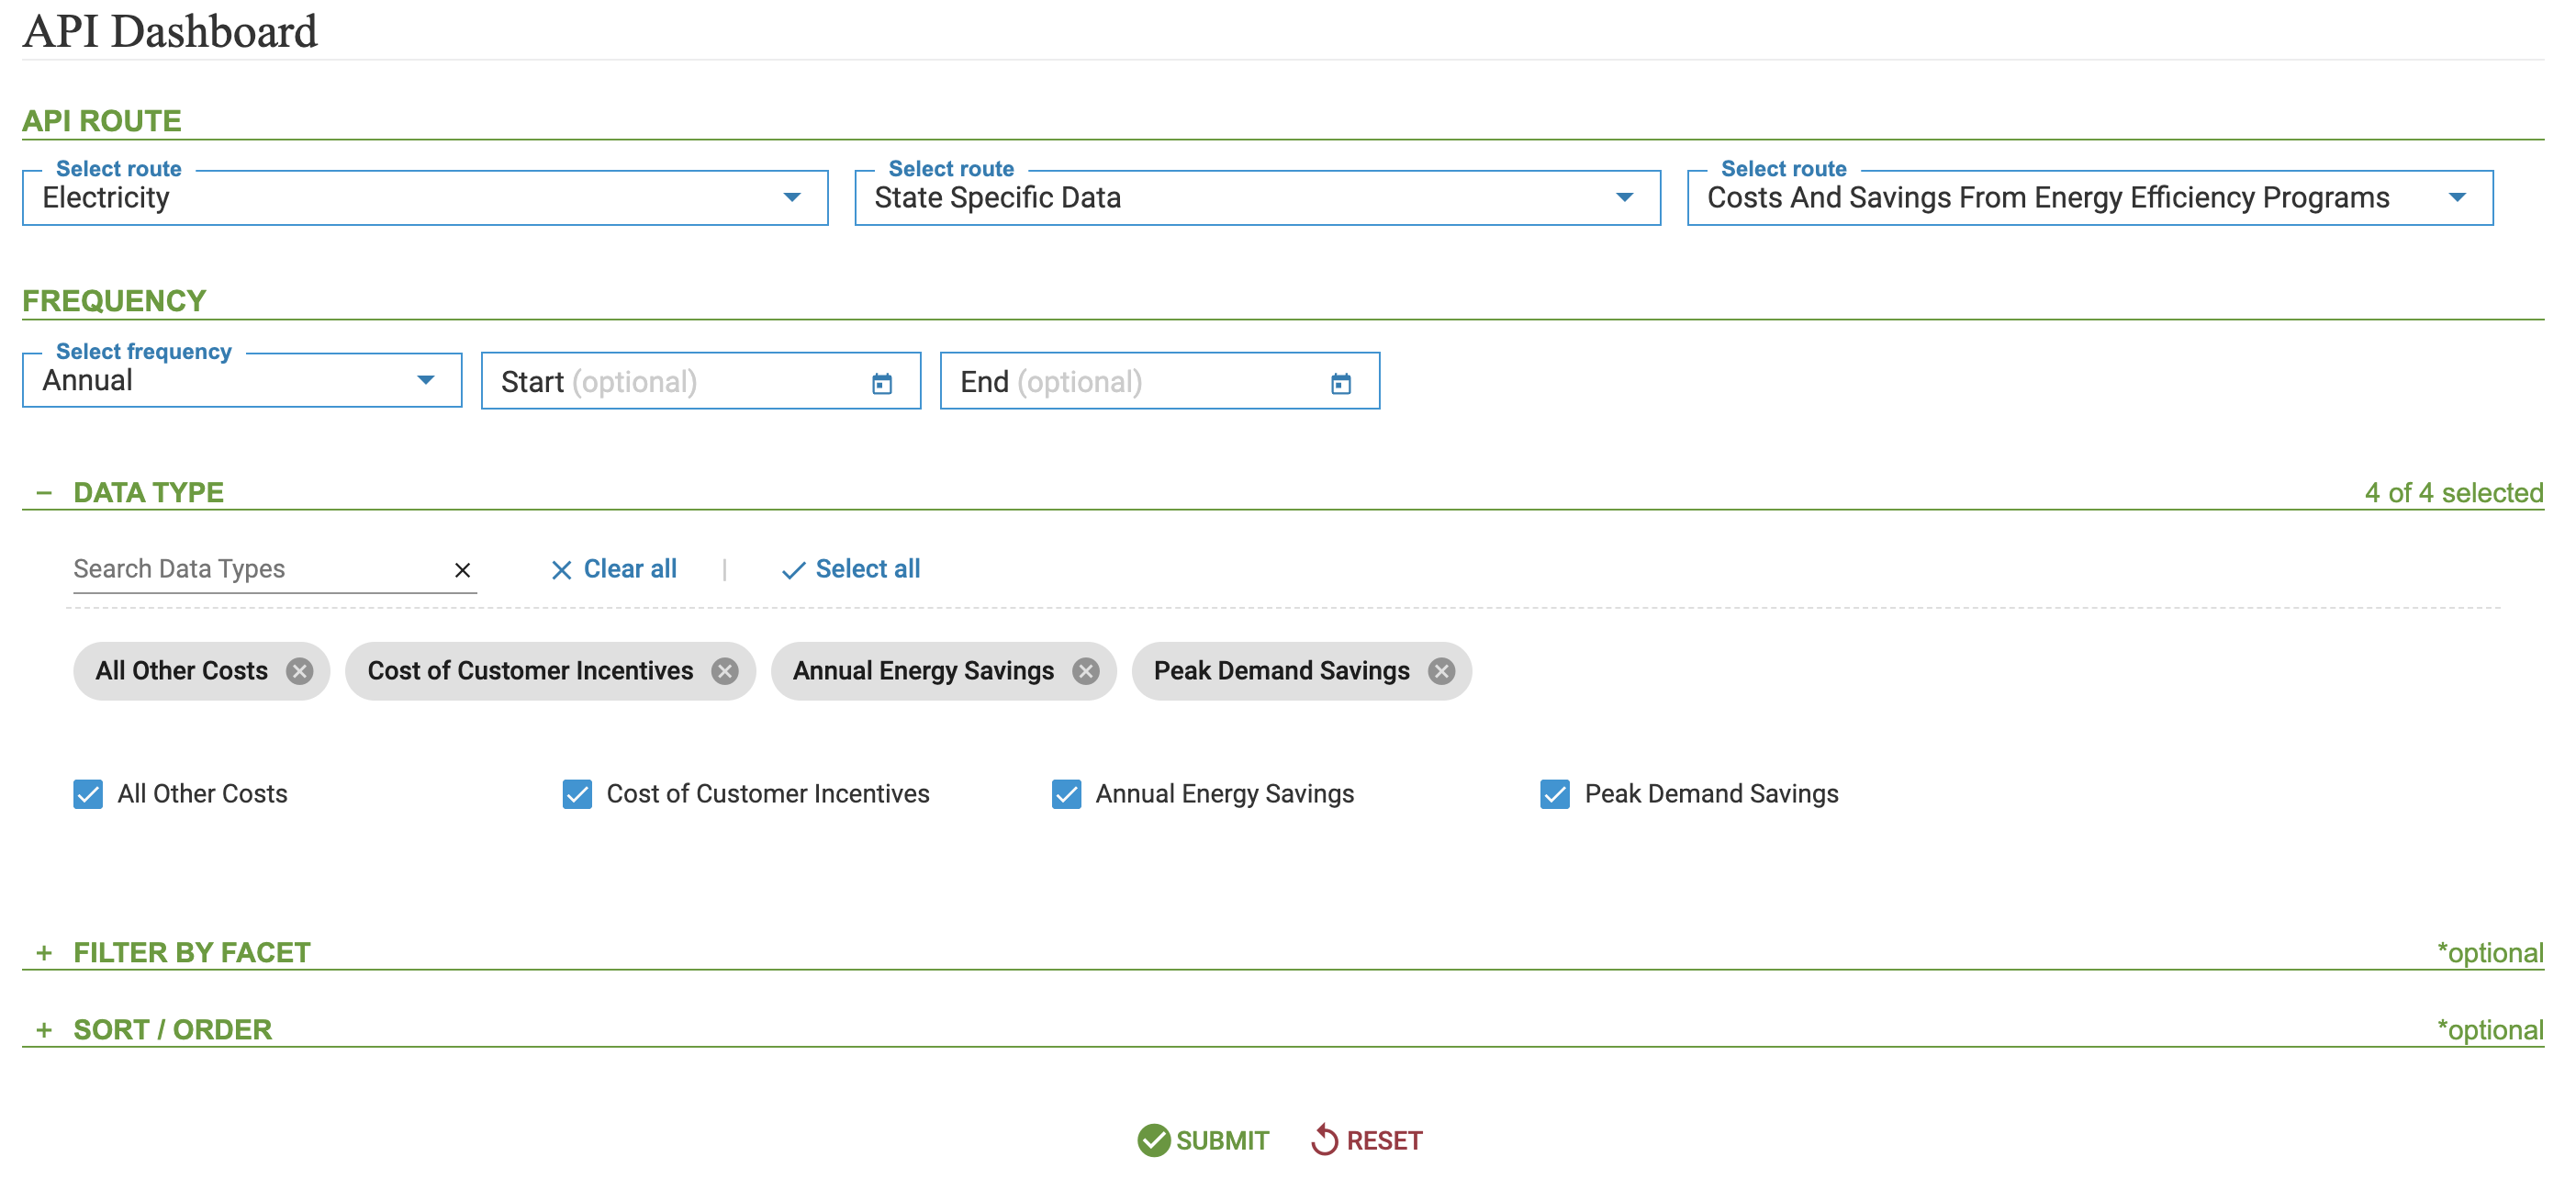

And then the API path and header should appear below with the data you should expect from this API call

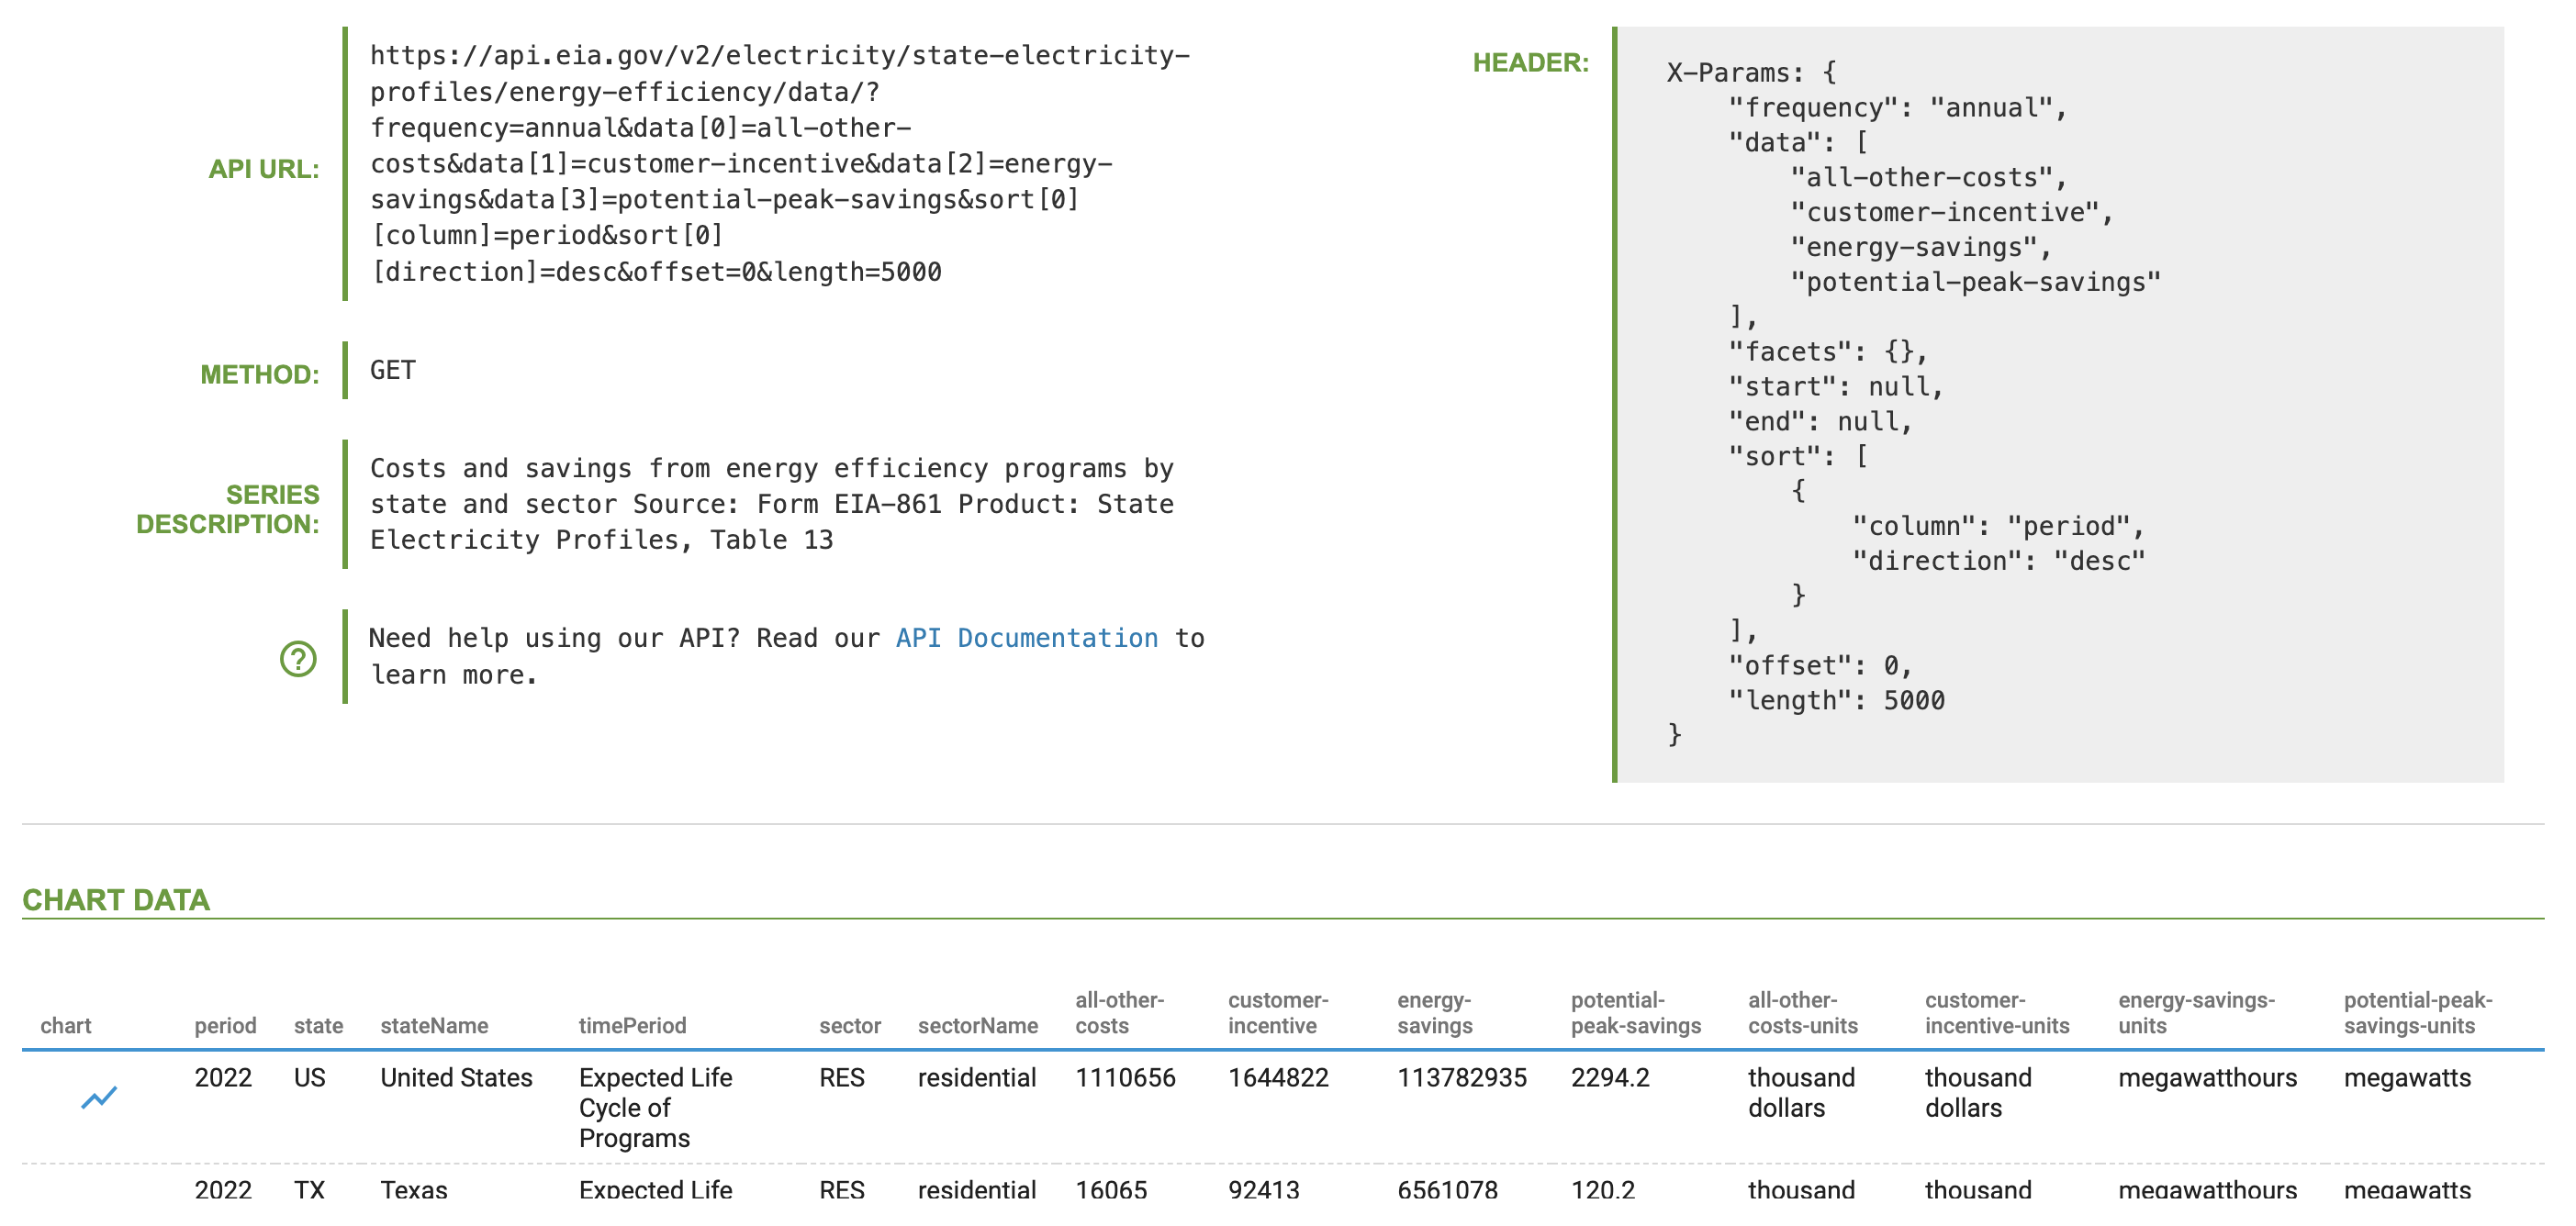


This API Dashboard from the EIA is a great resource and contains many combinations of API calls you can explore if you want to acquire your own data!

In [167]:
# Using the API
api_key = "RcDMeqbchpzjaUJsb5TbJdlgbX2F3CaLiPmwrjl9"
api_path = "https://api.eia.gov/v2/electricity/state-electricity-profiles/energy-efficiency/data/?frequency=annual&data[0]=all-other-costs&data[1]=customer-incentive&data[2]=energy-savings&data[3]=potential-peak-savings&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={}".format(api_key)

# Make the API request
response = requests.get(api_path)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the relevant data from the response
    df = pd.DataFrame(data['response']['data'])
    # Print the DataFrame
    display(df.head(3))
else:
    print(f'Request failed with status code {response.status_code}')

,period,state,stateName,timePeriod,sector,sectorName,all-other-costs,customer-incentive,energy-savings,potential-peak-savings,all-other-costs-units,customer-incentive-units,energy-savings-units,potential-peak-savings-units
0,2022,US,United States,Expected Life Cycle of Programs,RES,residential,1110656,1644822,113782935,2294.2,thousand dollars,thousand dollars,megawatthours,megawatts
1,2022,TX,Texas,Expected Life Cycle of Programs,RES,residential,16065,92413,6561078,120.2,thousand dollars,thousand dollars,megawatthours,megawatts
2,2022,TN,Tennessee,Expected Life Cycle of Programs,RES,residential,19938,1,120517,2.1,thousand dollars,thousand dollars,megawatthours,megawatts


## Data Exploration and Preparation

Before diving into visualizations, let's make sure our data is ready. Here's the plan:

1. **Check for Quality:** Look for any inconsistencies, duplications, or missing values that might need to be addressed before we proceed. 
2. **Focus on State and Sector:**  Examine the 'state' and 'sector' columns for potential insights and to guide our aggregations.

**Key Goal:** Ensure a clean and reliable dataset as the foundation for accurate and informative visualizations. 


In [168]:
# lets use pandas info() method to look at the datatypes and non-null values of each column!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   period                        4420 non-null   object
 1   state                         4420 non-null   object
 2   stateName                     4420 non-null   object
 3   timePeriod                    4420 non-null   object
 4   sector                        4420 non-null   object
 5   sectorName                    4420 non-null   object
 6   all-other-costs               4420 non-null   object
 7   customer-incentive            4420 non-null   object
 8   energy-savings                4420 non-null   object
 9   potential-peak-savings        4420 non-null   object
 10  all-other-costs-units         4420 non-null   object
 11  customer-incentive-units      4420 non-null   object
 12  energy-savings-units          4420 non-null   object
 13  potential-peak-sav

**Observations:**

* **No null values:** We can observe that there are no null values (which is expected as the data from EIA should be of high quality and cleaned already).

* **Accurate data type inference:**  It's important to note that reading from the CSV allowed pandas to infer the data types with high accuracy. Numerical columns such as 'energy-savings', 'potential-peak-savings', etc. were all inferred as int64 or float64. 

**Important:**  This automatic type inference won't happen if you get the data directly from the API.  Since the API response is in JSON format, all data types will initially be considered as objects (strings). 

In [169]:
# Lets explore the number of unique states and the number of unique sectors
print(f'There are {df.state.nunique()} unique states')
print(f'The unique sectors: {df.sectorName.unique().tolist()}')

There are 52 unique states
The unique sectors: ['residential', 'transportation', 'industrial', 'all sectors', 'commercial']


**Observations**

* **The Curious Case of 52 States:**  The extra "state" is the District of Columbia (DC). While not technically a state, it functions similarly for our analysis, so we'll keep it.

* **Cleaning Up Sectors:** The 'All Sectors' category is redundant since we can calculate it from other sectors. Let's remove this row to avoid data duplication.

**Actions:**

*   **Keep DC in the state data.**
*   **Remove the 'All Sectors' row from the sector data.**
*   **Separate US value in the state column from the other states**

By refining our data, we ensure our visualizations are accurate and meaningful!

In [170]:
def preprocess_data(df, filter_us=False):
    """
    Preprocesses the input DataFrame by filtering and selecting specific columns.

    Params:
        df (pd.DataFrame): Input DataFrame containing energy sector data.
        filter_us (bool, optional): If True, filters data for the US state only.
                                    If False, filters data for non-US states. Defaults to False.
    Returns:
        pd.DataFrame: Preprocessed DataFrame with selected columns and converted data types.
    """
    # Filter data based on the 'filter_us' parameter
    if filter_us:
        df = df[df.state == 'US']
    else:
        df = df[df.state != 'US']

    # Exclude rows with 'TOT' sector (All sectors identifier)
    df = df[df.sector != 'TOT']

    # Select specific columns of interest
    cols = ['period', 'state', 'sectorName', 'all-other-costs', 'customer-incentive', 'energy-savings', 'potential-peak-savings']
    df = df[cols]

    # Convert numerical columns to float data type (ensures the features are numerical no matter how the dataframe is loaded)
    numerical_cols = ['all-other-costs', 'customer-incentive', 'energy-savings', 'potential-peak-savings']
    df[numerical_cols] = df.loc[:, numerical_cols].astype('float')
    # specifically convert years (period) to integer
    df.period = df.period.astype('int')

    return df

In [171]:
# Preprocess data for states (excluding 'US')
states_df = preprocess_data(df)

# Preprocess data for 'US' only
us_df = preprocess_data(df, filter_us=True)

**Behind the Scenes: Preparing the Data for Show**

Remember, this step of data preparation is crucial, even if it comes from trustworthy sources like government agencies. Think of it like setting the stage: we make sure the props are in place and the lighting is just right.  Only then can the insights within the data truly shine.

Next up, we'll use Bokeh to transform our prepped data into interactive visualizations.


<a id='visualization-techniques'></a>
# Visualization Techniques with Bokeh

We'll employ various Bokeh visualization techniques to unveil the narratives hidden within our energy savings dataset, gradually building from straightforward explorations to more complex, interactive visualizations.

The 3 Main techniques I want to cover are:
- Line/Area Plots
- Bar Charts
- Chloropleth Maps

We will start each technique by asking a question. 

### How Have US Energy Savings Changed Over Time?

**Line Plots and Area Charts**: These visualizations effectively showcase trends and changes over time, capturing the overall trajectory of US energy savings.

_Applicability_: Best for trend analysis and time series data representation. May fall short in revealing intricate patterns within highly volatile datasets or when comparing numerous disparate data groups.

### How Do Different States Compare in Terms of Energy Savings?

**Interactive Line Plots**: Allow users to select and compare various states or groups of states, facilitating deeper exploration and uncovering state-specific energy saving trends.

_Applicability_: Ideal for comparison and user-driven discovery. Less valuable for static reports or when focusing on a singular, non-comparative data point.

### Which Sectors Contribute Most to Energy Savings?

**Bar Charts**: Dissect energy savings by sector, starting with a straightforward bar chart for individual sectors and evolving to a multi-level bar chart to capture nuances across multiple sectors over time.

_Applicability_: Excel in categorical data comparisons and rankings. Less suitable for continuous data or when the number of categories is too large, leading to cluttered visualizations.

### Where are the Geographical Hotspots for Energy Savings and Incentives?

**Chloropleth Maps**: Integrate GeoJSON data with Bokeh to paint a vivid picture of energy savings and customer incentives across the US, highlighting regional patterns and disparities.

_Applicability_: Unparalleled in showcasing spatial distributions and regional trends. Less effective when dealing with non-geographical or multi-dimensional data that cannot be easily mapped to physical locations.

By carefully selecting and applying these visualization techniques, we aim to unravel the stories hidden within our energy savings dataset, providing insights that inform decision-making and drive positive change in the energy sector.

<a id='demonstration'></a>
# Demonstration of Visualization Techniques with Bokeh

Let's bring our data to life! We'll begin with familiar visualization techniques common across many libraries.  This sets the foundation, and then we'll gradually demonstrate how Bokeh allows us to go further with interactivity and customization.

**NOTE**

In the PDF version of this notebook, Bokeh Plots are not loaded as they are embedded javascript. Using the `save` tool from Bokeh, I easily downloaded the plots and embedded them into the notebook!

## Line Plot and Area Chart: Tracing the Trends

Let's start by understanding the overall trajectory of energy savings in the US. 

Our question: How have these savings changed across the decade from 2013 to 2022?  

**First: A Simple Line Plot**

We'll begin with a line plot to visualize the total sum of energy savings in the US each year. Here's how:

*   **Data Preparation:** Group the US dataframe by year.
*   **Visualize:**  Plot the aggregated savings over time, with years on the x-axis and energy savings on the y-axis.

**Next, we could explore further with an area chart to emphasize the magnitude of savings over time.**

Let's get started!


In [172]:
# grouping by period (years) and get the sum of energy savings per year (sums all sectors)
us_energy = us_df.groupby('period')['energy-savings'].sum()
us_energy

period
2013    274593768.0
2014    328422143.0
2015    322475891.0
2016    381847916.0
2017    404725918.0
2018    387861212.0
2019    383779042.0
2020    367829206.0
2021    300327216.0
2022    273589534.0
Name: energy-savings, dtype: float64

**Creating Our First Bokeh Visualization**

Let's dive into the world of Bokeh! Here's the basic structure:

*   **The Canvas: The `figure` Object** Think of it as the blank canvas where we'll paint our visualization. It's completely customizable. Everything is connected to the figure object -> titles, legends, axes, etc. This is where we will add our renderers (any visual element representing either data or information.
*   **Adding Elements: Glyphs** These are the shapes and forms we place on the canvas – like lines, circles, bars, and more. If you are familiar with matplotlib, think of these as the `artist` objects
*   **Customization: Titles, Labels, and More** We can adjust the look of our plot to make it informative and visually appealing.
*   **Themes**: Bokeh has a variety of built-in themes we can choose from to refine the text font and styling of our visualizations! [Link](https://docs.bokeh.org/en/latest/docs/user_guide/styling/themes.html#themes). Also you can even create your own custom themes too if you want to incorporate your own unique flair

**For now, we'll focus on creating a simple figure and adding our line. Later, we'll explore the cool tools and interactive features Bokeh offers!**


In [173]:
# lets create the x and y variables for the plot
x = us_energy.index.to_list() # the years
y = us_energy # the values of energy-savings 

In [174]:
# Create a Bokeh figure -> we can directly set the title, the axis labels and the height/width initially
p = figure(title='US Energy Savings over 2013 to 2022', x_axis_label='Year', y_axis_label='Energy Savings (MegaWatt Hours)', 
           tools="", toolbar_location=None, height=400, width=600)

# passing in the x and y values to a line glyph that will be added, we also set the line width and legend labe
p.line(x, y, line_width = 2, legend_label='US Energy Savings')

# we use the show function to display the plot (figure) now with all its renderers
show(p)

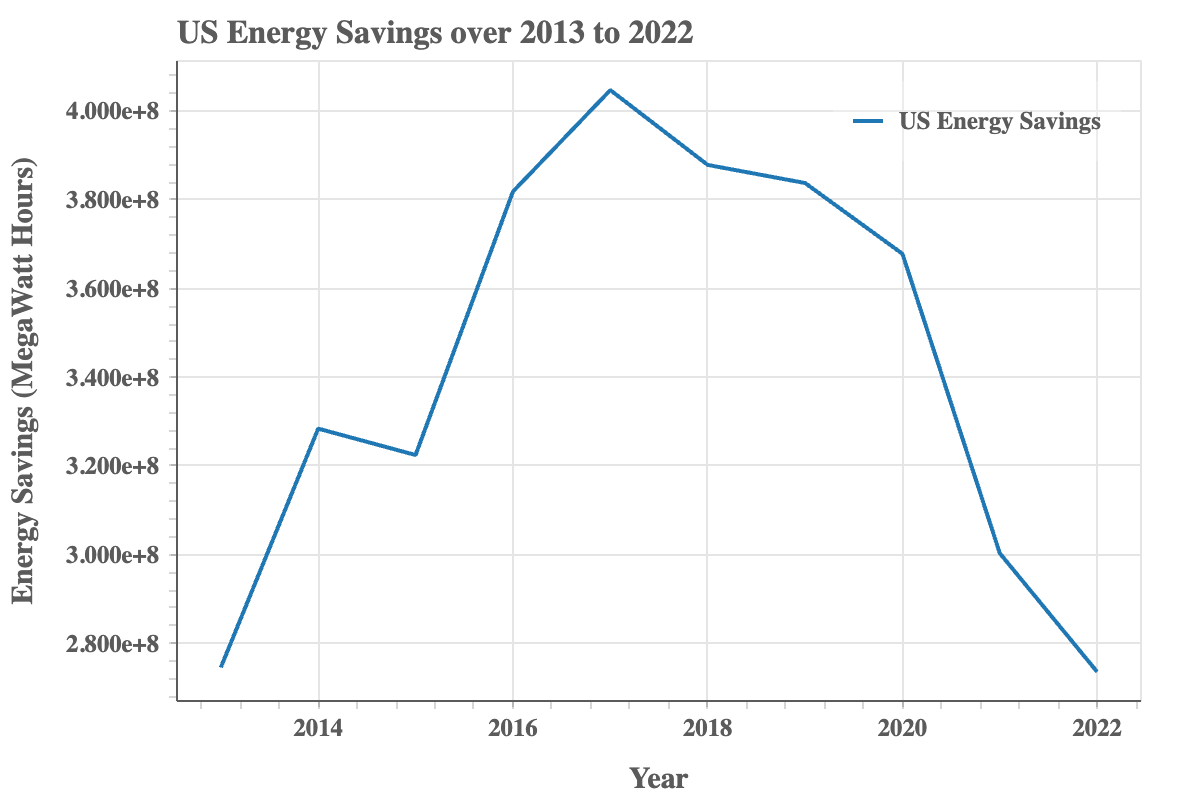

**Beyond Basic: Enhancing Our Visualization with Bokeh**

While our first plot gets the job done, this is a very basic plot that appears to be made in excel. Let's unlock the true power of Bokeh to make it more engaging and insightful!

Let's introduce some of Bokeh's unique and powerful features!

**The Interactive Edge: Bokeh's Toolbar**

This is where Bokeh shines! The toolbar gives users control to explore the data themselves. Here's just a sample of what we could do:

*   **Hover for Details:**  We'll customize the hover tool to reveal more than just the x and y values.  Imagine seeing  additional data points or relevant statistics on hover!
*   **Add a Legend:** If we plot multiple lines (for states or sectors), a legend will be essential for clarity.
*   **Theming:** Give our visualization a cohesive look by applying a custom or built-in Bokeh theme.
*   **Make it Responsive:** Ensure our plot looks great on any screen size with Bokeh's responsive sizing options.
*   **Color Power:**  If we work with different categories, strategic color mapping can enhance understanding.

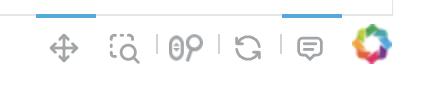

Also see that rainbow colored circular icon? This is a link directly to the Bokeh Documentation, allowing others to be introduced to Bokeh with ease!

I also want to provide more information on Bokeh's ColumnDataSource that we will use from here on out

`ColumnDataSource` is a core Bokeh data structure that organizes data into a columnar format, making it ideal for creating interactive plots. It maps column names to data sequences, facilitating the connection between data and visual elements in Bokeh visualizations.

This is the most important features in my opinion to understand
- **Shared Data**: Can be used across multiple plots and widgets, ensuring synchronized updates.
- **Interactivity**: Enhances plot interactivity by linking data changes to visual updates.

With this concept of shared data, to make interactive and dynamic plots we can easily update the information inside the DataSource object, instead of clearing and creating a new plot everytime!

In [175]:
# lets use bokeh's column data source
source = ColumnDataSource(data=dict(x=x, y=y))

# intialize the figure containing the renderers
p = figure(title='US Energy Savings over 2013 to 2022', x_axis_label='Year', y_axis_label='Energy Savings (MegaWatt Hours)', 
           tools="pan,wheel_zoom,box_zoom,reset,save", toolbar_location='right', height=400, width = 650)

# Glyphs to add to the figure!
# create the line plot and the circle markers
line_plot = p.line('x', 'y', source=source, line_width = 2.0, legend_label='USA')
circle_markers = p.circle('x', 'y', source=source, size=5, fill_color="blue", line_color="blue", alpha=0.6)
# Create the filled area
p.varea('x', 'y', source=source, fill_color='blue', fill_alpha=0.3)

# format the legend
p.legend.location = "top_left"
p.title.align = 'center' # to center the title

# lets start the y-axis range from 0
p.y_range.start = y.min()
# format y-axis ticks to be more readable
p.yaxis.formatter = NumeralTickFormatter(format="0 a")

# add hover tool but only for the line and circles -> format energy savings into a more clear format
hover = HoverTool(renderers=[line_plot, circle_markers], tooltips=[("Year", "@x"), ("Energy Savings", f"@y{{0.0a}} MWh")])
p.add_tools(hover)

# apply a theme
curdoc().theme = 'caliber'
# display the plot
show(p)

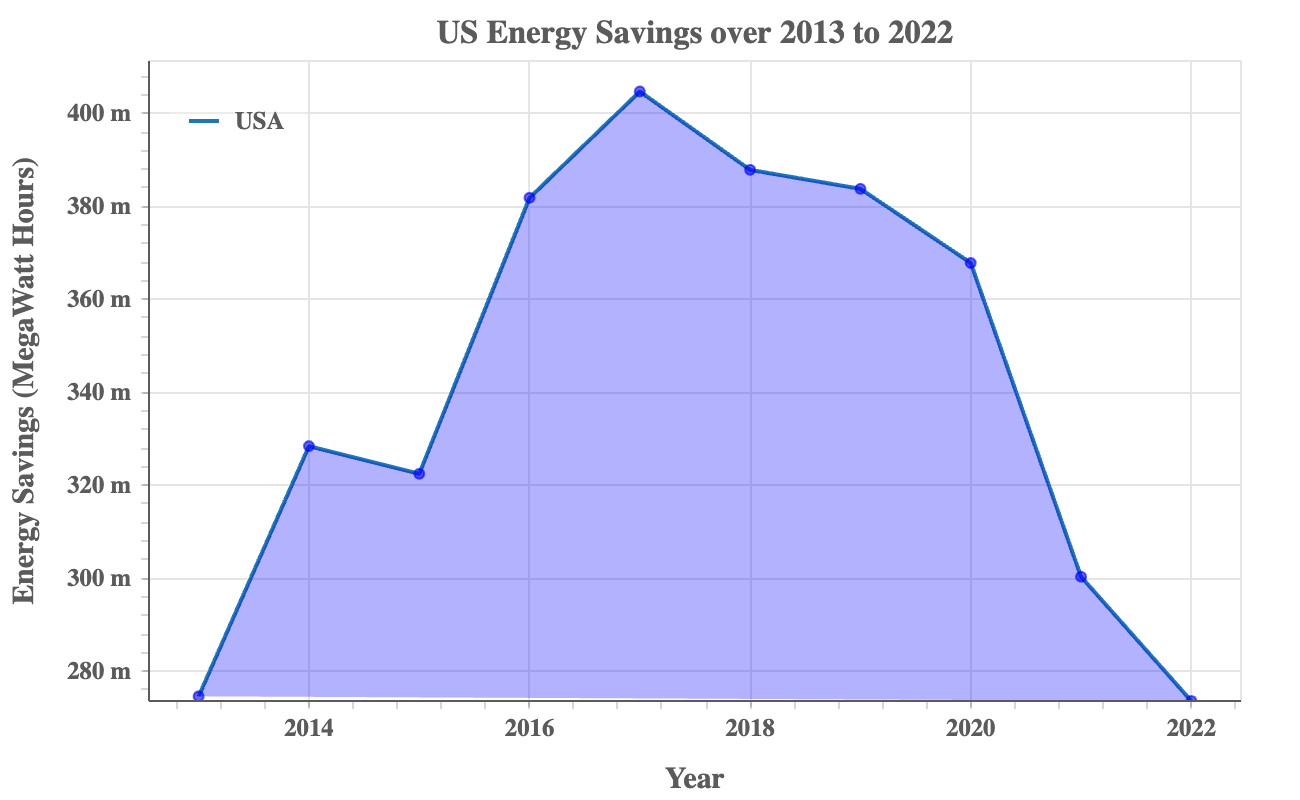

**Hover Example**
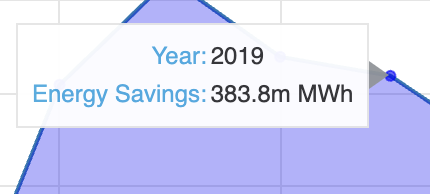

This upgraded visualization definitely more eye catching and expressive!  Features like panning, zooming, and detailed tooltips empower the viewer to dig deeper into the data.

*   **Visual Impact:** The 'caliber' theme gives it a polished look, while the filled area emphasizes the growth of energy savings. 
*   **Inviting Interaction:**  This plot isn't just for looking – with the toolbar the user could be inclined to spend more time exploring the tools and thus understanding the data at a higher level.

In my opinion, our visualization should no longer be considered just a graph; it's a dynamic tool for uncovering insights within the energy savings data.

### Going further with Line Plots: Powering Up with Interactivity and Widgets

Up until now, our plots have been representing static data.  Now, let's make them truly dynamic using Bokeh's interactive features and widgets. This is where we will really see the true power of Bokeh

Instead of looking at just the US, lets start looking at the States of the US individually. If we choose to use the same singular line plot, it is easy to imagine with 51 states the plot will start looking cluttered and unreadable. Also creating 51 plots for each state also seems very inefficient. Who has time to look at each plot and afterwards make inferences by remembering different plots?

I believe the solution is having a single plot/figure, however having an interactive widget (dropdown or select box) where we can choose the state we want to look at. This will allow the user to quickly examine multiple states of interest without having an unreadable mess of either too many lines or figures

First since the code will be more complex I want to preface with some concepts and why I choose to use a class based approach for the rest of the notebook.


Lets start by manipulating the data using pivot tables to put our data in a format that will be easy to integrate into bokeh

In [176]:
# pivot the table
states_energy_period = states_df.pivot_table(values='energy-savings', index='period', columns='state', aggfunc='sum')
states_energy_period.head(3)

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
period,,,,,,,,,,,,,,,,,,,,,
2013,9121.0,1379678.0,3797712.0,8761451.0,36169688.0,6060521.0,3448679.0,547913.0,9009.0,3023852.0,...,215923.0,4572526.0,5915809.0,2727441.0,331797.0,1236872.0,11211741.0,9552118.0,1074746.0,386812.0
2014,4824.0,1358321.0,3137787.0,12555077.0,38172466.0,6461576.0,4665169.0,570548.0,65341.0,2566458.0,...,253096.0,4488359.0,11229892.0,2772519.0,1323812.0,1187420.0,13129609.0,8648252.0,1169075.0,252006.0
2015,4355.0,714823.0,3750279.0,13933856.0,37904034.0,6950717.0,4810807.0,993880.0,170765.0,2121068.0,...,374327.0,2932796.0,11414023.0,2326685.0,1597006.0,1405373.0,10467788.0,9609282.0,1131600.0,431524.0



**Object-Oriented Programming (OOP): Building Blocks for Flexibility**

As our visualizations become more complex, we'll turn to Object-Oriented Programming (OOP) principles for better code organization and flexibility. Here's why:

* **Building blocks for customization:**  Think of a class as a blueprint for creating visualization objects. This lets us easily create visualizations with tailored variations in their appearance and behavior.

* **Managing state effectively:** Data visualizations often have an internal state – the plot itself, data, and settings. OOP lets us encapsulate this state within a class, making management cleaner.

* **Scalability:** An OOP approach lets us start with a basic visualization template and expand it with new features. This promotes code reusability as the project grows in the future.

In the next cell will be a class that implements what I have described that we want to do.


Don't get overwhelmed by the class structure or code – remember that our main goal is to build a dynamic plot that updates based on user selections.

**The `EnergySavingsPlot` Class: A Brief Overview**

This class is designed to visualize energy savings across different states. In a nutshell, it:

*   **Stores data and sets up the plot elements.**
*   **Calculates trendlines to show overall changes in energy savings.**
*   **Creates and updates the Bokeh plot with interactive elements.**

**Key Takeaway**

The details of the class might seem a little intricate, but the essential point is that it lets us change which state's data we visualize with just a few clicks in a dropdown menu.  Our focus is on this interactivity!

In [177]:
class EnergySavingsPlot:
    def __init__(self, data, initial_state='AK'):
        """
        Initialize the EnergySavingsPlot class.

        :param data: The energy savings data.
        :param initial_state: The initial state to display (default: 'AK').
        """
        self.data = data
        self.state = initial_state
        self.years = data.index.tolist()
        self.states = data.columns.tolist()
        self.source = ColumnDataSource(data={'x': self.years, 'y': self.data[self.state]})
        self.trendline_source = ColumnDataSource(data={'x': self.years, 'y': self.calculate_trendline(self.state)})
        self.plot = self.create_plot()
        self.add_trendline()
        self.select = Select(title="State:", value=self.state, options=self.states)
        self.select.on_change('value', self.update_plot)

    def calculate_trendline(self, state):
        """
        Calculate the trendline for a given state.

        :param state: The state to calculate the trendline for.
        :return: The trendline values.
        """
        coefficients = np.polyfit(self.years, self.data[state], 1)  # 1 means linear
        return np.polyval(coefficients, self.years)

    def calculate_slope(self, state):
        """
        Calculate the slope of the trendline for a given state.

        :param state: The state to calculate the slope for.
        :return: The slope of the trendline.
        """
        coefficients = np.polyfit(self.years, self.data[state], 1)  # 1 means linear
        slope = coefficients[0]  # The first coefficient is the slope
        return slope

    def create_plot(self):
        """
        Create the Bokeh plot for energy savings over time.

        :return: The created Bokeh plot.
        """
        plot = figure(title=f"Energy Savings over Time - {self.state}", x_axis_label='Year', y_axis_label='MegaWatt Hours (MWh)', height=400, width=650)
        plot.title.text_font_size = '12pt'
        plot.title.align = 'center'
        plot.line(x='x', y='y', source=self.source, line_width=2)
        plot.circle(x='x', y='y', source=self.source, size=5, fill_alpha=0.6, line_color='blue')
        hover = HoverTool(tooltips=[("Year", "@x"), ("Energy Savings", "@y MWh")])
        plot.add_tools(hover)
        curdoc().theme = 'caliber'
        plot.yaxis.formatter = NumeralTickFormatter(format="0 a")
        return plot

    def add_trendline(self):
        """
        Add the trendline and slope label to the plot.
        """
        self.plot.line('x', 'y', source=self.trendline_source, line_width=1.5, line_color="red", line_dash="dotted")
        slope = self.calculate_slope(self.state)
        slope_text = f"Slope: {slope:.2f} MWh/year"
        self.slope_label = Label(x=300, y=300, x_units='screen', y_units='screen',
                                 text=slope_text,
                                 text_font_size="10pt",
                                 text_font="Helvetica",
                                 text_font_style="bold",
                                 background_fill_color='white', background_fill_alpha=0.7)
        self.plot.add_layout(self.slope_label)

    def update_plot(self, attr, old, new):
        """
        Update the plot when the selected state changes.

        :param attr: The attribute that changed.
        :param old: The old value of the attribute.
        :param new: The new value of the attribute.
        """
        self.state = new
        new_data = {'x': self.years, 'y': self.data[self.state]}
        self.source.data = new_data
        self.trendline_source.data = {'x': self.years, 'y': self.calculate_trendline(self.state)}
        self.plot.title.text = f"Energy Savings over Time - {self.state}"
        new_slope = self.calculate_slope(self.state)
        self.slope_label.text = f"Slope: {new_slope:.2f} MWh/year"

    def layout(self):
        """
        Create the layout for the plot and state selection.

        :return: The layout column.
        """
        return column(self.select, self.plot)

Now that we have our class template, how will we render the dynamic figure/plot into our notebook?

To do this, we'll employ callback functions that modify the internal state of our visualization class whenever the user interacts with the state dropdown widget. Within Jupyter Notebooks, there are multiple ways to achieve this, but I've opted for a straightforward approach using Bokeh's `FunctionHandler` and `Application` objects. This lets us embed a Bokeh Server directly into our notebook. The `FunctionHandler`  will receive a function that the application uses to generate the initial plot setup. 

In [178]:
# Define a function that sets up your plot and adds it to the document
def setup_plot(doc):
    # Create an instance of your plot class
    plot_instance = EnergySavingsPlot(states_energy_period)
    # Add the layout from your instance to the document
    doc.add_root(plot_instance.layout())

# Use the new function with FunctionHandler
handler = FunctionHandler(setup_plot)
app = Application(handler)

# Show the application
show(app, notebook_url="localhost:8889")

Examples -> Using the interactive Plot

The Default Plot
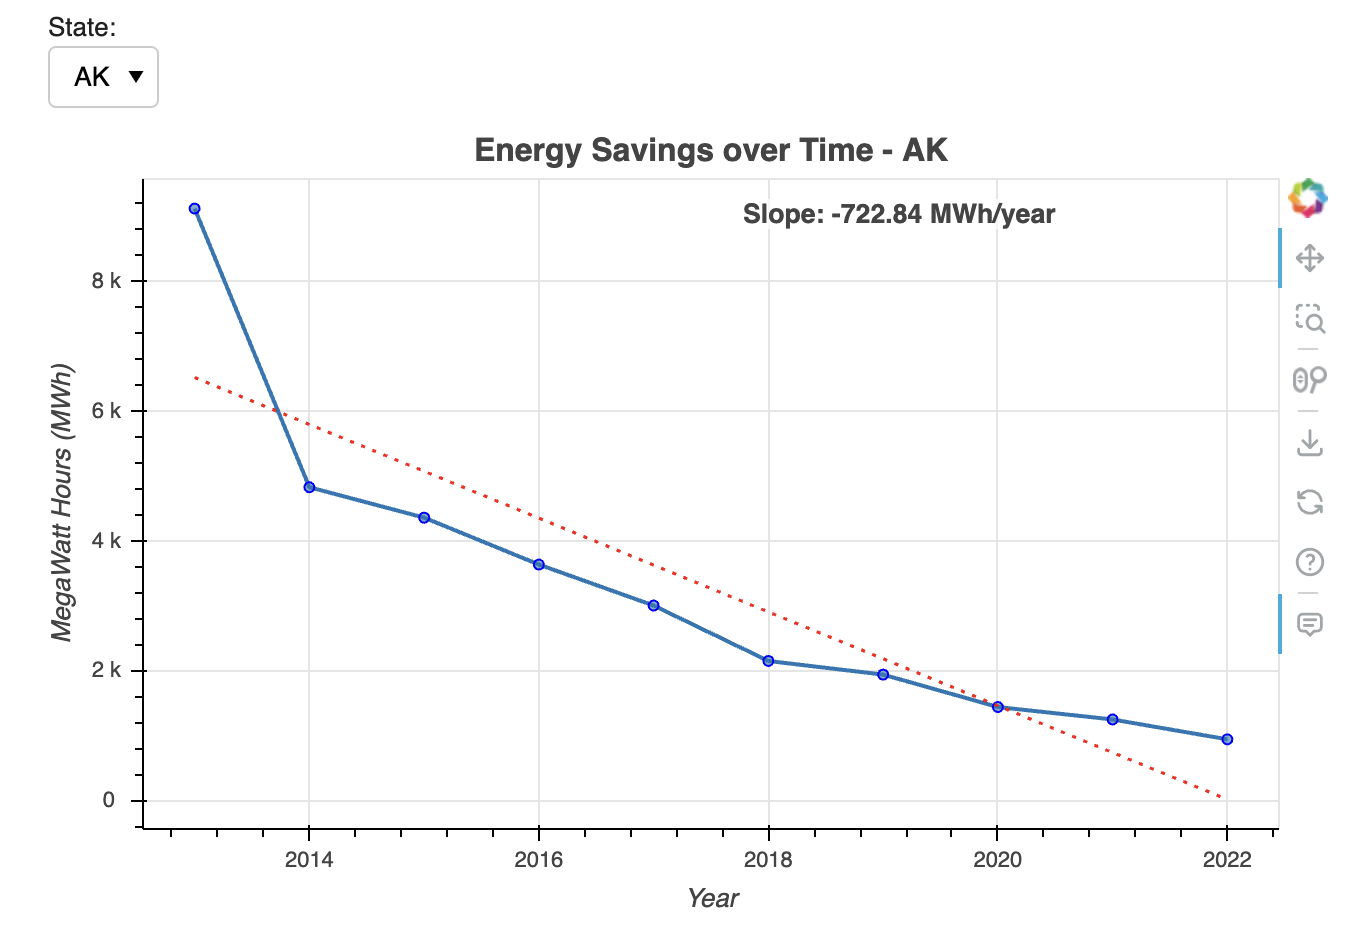
The DropDown Widget
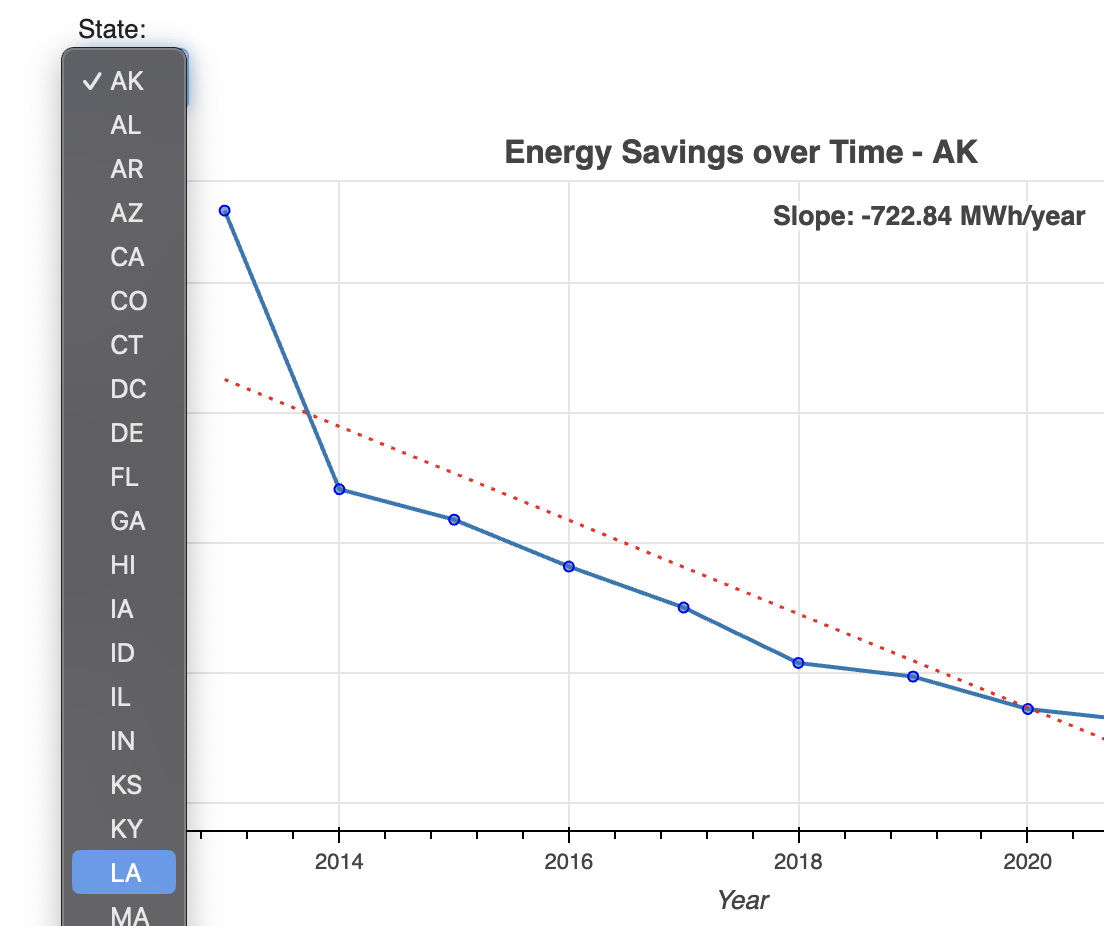
Example of Another -> Switching to Vermont
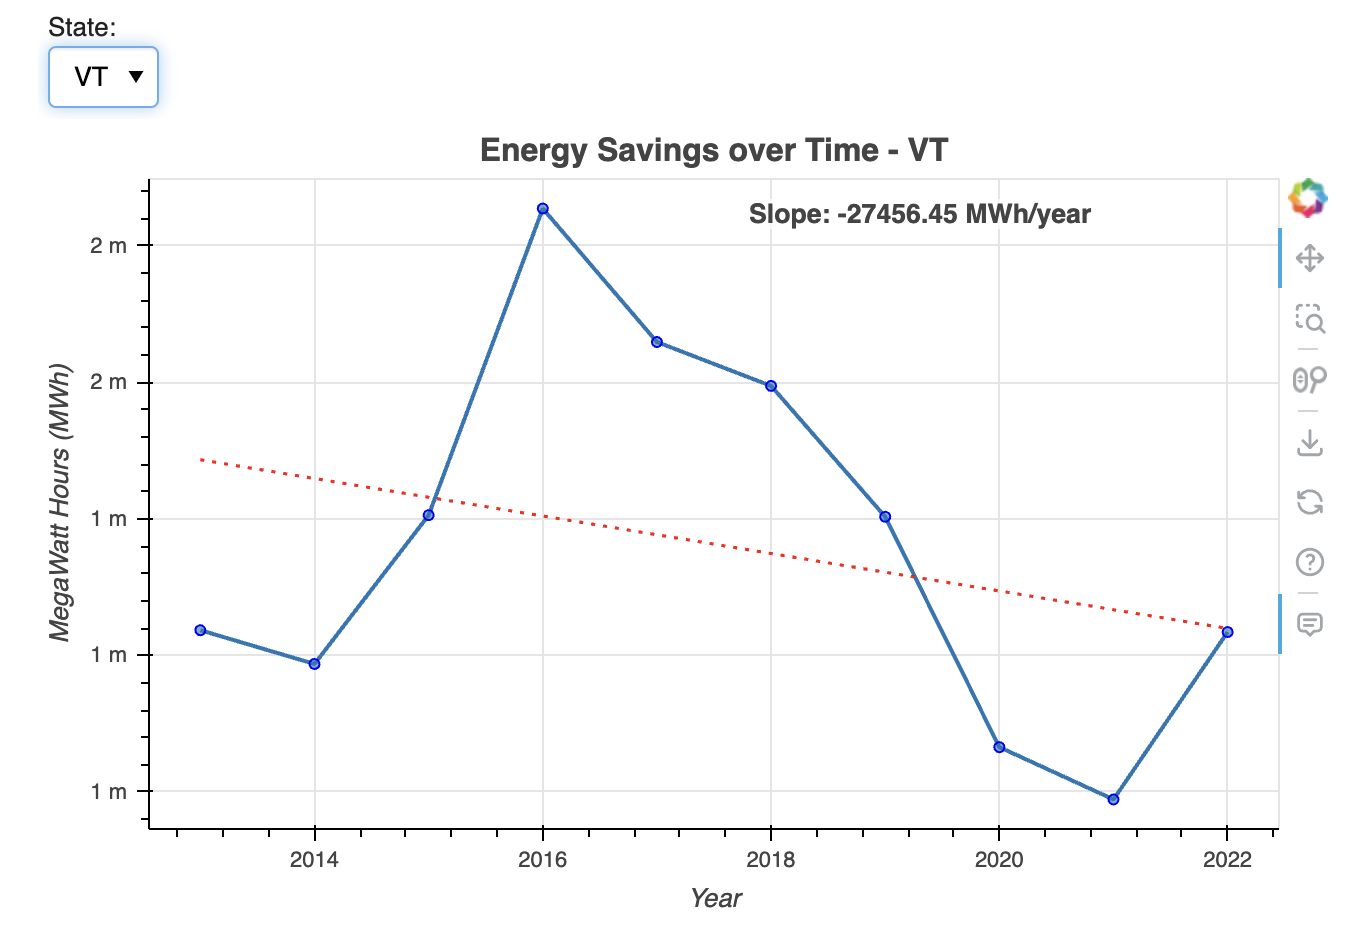

We can now look at each state individually and look at the general trends (trendline). This dynamic rendering through an embedded bokeh server allows great customization and power. 

You can see that I added an extra trendline (using add_trendline) to show the general direction the energy savings have taken over the time period and also included the Slope (calculate_slope) as a quantitative statistics to the user.

I want you to understand that with this class based approach we can write more methods to add elements to the dynamic plot with ease.

## Bar Charts

After exploring trends over time, let's switch gears and dive into categorical comparisons with bar charts.

**Let's tackle a New Question: Do Energy Savings Differ Across Sectors?** 

Bar charts will help us visualize and compare energy savings within different sectors, potentially revealing which areas contribute the most. Let's see what the data reveals! 

Let's start off by making a multi-level bar chart to show the trends for each sector over time, instead of a line plot, lets use a bar chart to let the user make easy comparisons between each sector


In [142]:
# lets create a copy of the states to avoid any mistakes in data manipulation
sectors_df = states_df.copy()
sectors_df.period = sectors_df.period.astype('str')
# we will pivot to groupby sectors and years
sectors_per_year = sectors_df.pivot_table(values='energy-savings', index='sectorName', columns='period')
# and we will perform a transformation to ensure all the data is on a similar scale
sectors_per_year = np.cbrt(sectors_per_year)

In [143]:
#  lets look at what we have!
sectors_per_year

period,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
sectorName,,,,,,,,,,
commercial,110.529173,118.119740,119.102427,125.163758,128.849688,126.939937,125.087549,155.113821,144.522064,139.153267
industrial,74.179481,74.807763,72.832728,70.605890,70.566404,71.025519,70.553511,86.733823,77.773639,75.996150
residential,97.572384,104.773043,102.711783,112.625351,113.843908,111.667928,113.148691,141.371952,133.864611,130.667921
transportation,16.738040,14.441966,12.776670,13.043421,12.269762,18.486070,17.658577,13.221744,9.795316,3.444916


**Our plan:**

We will create an interactive bar chart using Bokeh to visualize the energy savings by sector over time. The chart will display the cube root of the energy savings for each sector-year combination, allowing us to compare the relative magnitudes across sectors and years.

The code below prepares the data by combining sectors and years into a single list of tuples, which will be used as the x-axis values. The corresponding energy savings values are extracted from the `sectors_per_year` DataFrame and stored in the `counts` list.

A `ColumnDataSource` is then created to hold the data for plotting. The figure is customized with appropriate height, width, and title, and the x-axis tick labels are removed for clarity.

The bars are rendered using `vbar()`, with colors assigned based on the sector using `factor_cmap()`. The plot is further enhanced with hover tooltips, a custom legend, and other visual improvements.

Finally, the resulting plot is displayed using `show()`, providing an interactive visualization of energy savings by sector over time.

In [144]:
# Prepare the data for plotting
sectors = sectors_per_year.index.tolist()
years = sectors_per_year.columns.tolist()

# Generate the x values (years and sectors combination)
x = list(product(years, sectors))

# Generate the counts values matching the x pairs
counts = [sectors_per_year.at[sector, year] for year, sector in x]

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(x=x, counts=counts))

In [145]:
# Create the figure - settings the height/width, title, and setting the toolbar (location and params)
p = figure(x_range=FactorRange(*x), height=350, width=800, title="Energy Savings by Sector over Year",
           y_axis_label = "Cubed Root of MegaWatt Hours (MWh)", x_axis_label = "Years",
           toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# remove x tick labels as we will use a legend to identify the sectors
p.xaxis.major_label_text_font_size = '0pt'
# center the title
p.title.align = 'center'
# lets increase the font of the title
p.title.text_font_size = '14pt'

# Render the bars, using the same factor_cmap for each year-sector pair
colors = ['#718dbf', '#e84d60', '#ddb7b1', '#c9d9d3']
p.vbar(x='x', top='counts', width=.9, source=source,
       line_color="grey",
       fill_color=factor_cmap('x', palette=colors, factors=sectors, start=1, end=len(sectors)))

# Set some properties to make the plot look better
p.y_range.start = 0
p.x_range.range_padding = 0.1
#p.xaxis.major_label_orientation = 1.57  # Rotated for better readability
p.xgrid.grid_line_color = None

# hover bar
hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Sector", "@x"), ("Cube Root Energy Savings", "@counts")]

# custom legend
# List of tuples with sector names and their corresponding colors
legend_items = [(sector, color) for sector, color in zip(sectors, colors)]
# Create an empty list to hold the legend items
legend_it = []
# Add the legend items with empty glyphs (since the vbars are already in the figure)
for (label, color) in legend_items:
    legend_it.append((label, [p.square(color=color, visible=False, line_color='black')]))

# Create a Legend object
custom_legend = Legend(items=legend_it, location="top_left", title='Sector')
p.add_layout(custom_legend, 'right')

# Show the plot
show(p)

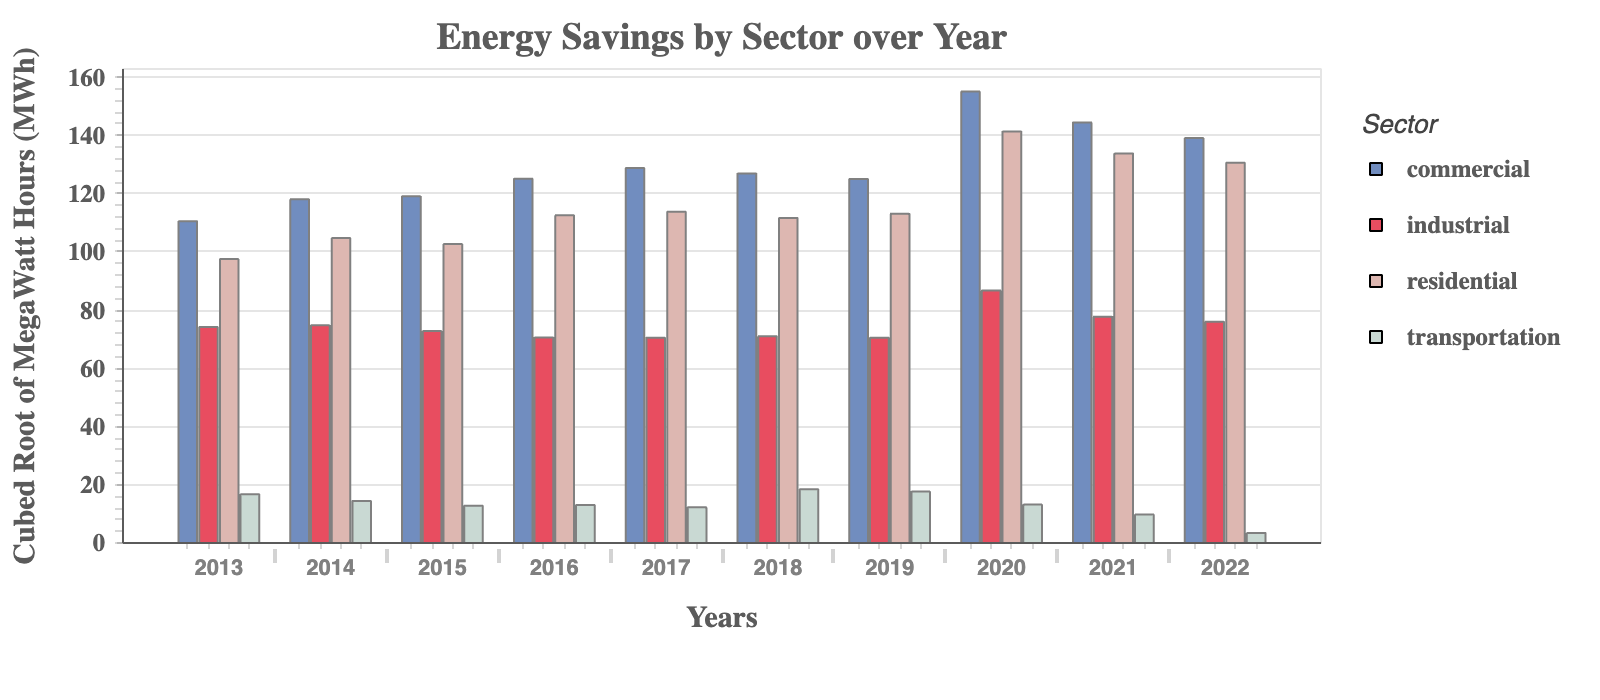

This plot already provides valuable insights and is quite refined visually! The consistent color scheme, legend, and well-structured layout effectively highlight trends in energy savings across sectors. We can see that already that even though there is quite a bit of variance between states over time, the sectors have remained at a constant of energy savings over time. Only the residential and transportation sectors have a trend of increasing savings over this period of time. The commercial and industrial have less energy savings and have shown little change over time (the transportation even going down in 2022!)

But, let's take it to the next level!

Instead of focusing solely on energy savings, let's add interactivity and allow users to dynamically switch between different columns from the data instead of just Energy Savings.

We will write another class very similar to `EnergySavingsPlot` called BarPlot that now will create a new pivot table based on the selected 'column' in the dropdown widget. As you will see, the core of these classes is having an initial method `setup_plot` that will first initialize a default plot and having update methods to update the properties of the data and the dynamic figure. The main difference here is that instead of just selecting a column of data from one pivoted table, we will recompute the pivot table entirely, thus making it a more complex process of updating data.

**The main takeaway** I want you to get is to show the power of an OOP approach, we store the data as a state and we can complex operations on it with ease to make dynamic changes to our figure!

In [146]:
class BarPlot:
    def __init__(self, data):
        """
        Initialize the BarPlot class.

        :param data: The data to be plotted.
        """
        self.data = data
        self.pivot_column = 'energy-savings'  # Default pivot column
        self.dropdown = Select(title="Select column to pivot:",
                               value='energy-savings',
                               options=['all-other-costs', 'customer-incentive', 'energy-savings', 'potential-peak-savings'])
        self.dropdown.on_change('value', self.update_plot)
        self.source = ColumnDataSource(data=dict(x=[], counts=[]))  # Initialize with empty data
        self.setup_plot()
        self.update_data()  # Initial data setup

    def setup_plot(self):
        """
        Set up the Bokeh plot with initial configuration.
        """
        self.plot = figure(x_range=FactorRange(), height=350, width=800,  # Initialize with empty FactorRange
                           title="Energy Savings by Sector over Year", y_axis_label = "Cubed Root of MegaWatt Hours (MWh)", x_axis_label = "Years",
                           toolbar_location=None, tools="")
        self.colors = ['#718dbf', '#e84d60', '#ddb7b1', '#c9d9d3']
        self.vbar = self.plot.vbar(x='x', top='counts', width=.9, source=self.source,
                                   line_color="grey", fill_color=factor_cmap('x', palette=self.colors, factors=[], start=1, end=len(self.colors)))
        self.plot.xaxis.major_label_text_font_size = '0pt'
        self.plot.title.align = 'center'
        self.plot.y_range.start = 0
        self.plot.x_range.range_padding = 0.1
        self.plot.xgrid.grid_line_color = None

        # hover bar
        hover = HoverTool(tooltips=[("Sector", "@x"), ("Cube Root Energy Savings", "@counts")])
        self.plot.add_tools(hover)

        # List of tuples with sector names and their corresponding colors
        legend_items = [(sector, color) for sector, color in zip(sectors, self.colors)]

        # Create an empty list to hold the legend items
        legend_it = []

        # Add the legend items with empty glyphs (since the vbars are already in the figure)
        for (label, color) in legend_items:
            legend_it.append((label, [self.plot.square(color=color, visible=False, line_color='black')]))

        # Create a Legend object
        custom_legend = Legend(items=legend_it, location="top_left", title='Sector')
        self.plot.add_layout(custom_legend, 'right')

    def update_data(self):
        """
        Update the data for the plot based on the selected pivot column.
        """
        sectors_per_year = self.data.pivot_table(values=self.pivot_column, index='sectorName', columns='period')
        sectors_per_year = np.cbrt(sectors_per_year)
        self.sectors = sectors_per_year.index.tolist()
        years = sectors_per_year.columns.tolist()
        self.x = list(product(years, self.sectors))
        counts = [sectors_per_year.at[sector, year] for year, sector in self.x]
        self.plot.x_range.factors = self.x  # Update the factors to reflect new data
        self.vbar.glyph.fill_color = factor_cmap('x', palette=self.colors, factors=self.sectors, start=1, end=len(self.colors))
        self.source.data = dict(x=self.x, counts=counts)

    def update_plot(self, attr, old, new):
        """
        Update the plot when the selected pivot column changes.

        :param attr: The attribute that changed.
        :param old: The old value of the attribute.
        :param new: The new value of the attribute.
        """
        self.pivot_column = new
        self.update_data()
        self.plot.title.text = f"{self.pivot_column.title()} by Sector over Year"
        self.plot.yaxis.axis_label = self.get_y_axis_label(self.pivot_column)


    def get_y_axis_label(self, pivot_column):
        labels = {
            'all-other-costs': 'Cubed Thousand Dollars ($)',
            'customer-incentive': 'Cubed Thousand Dollars ($)',
            'energy-savings': 'Cubed Root of MegaWatt Hours (MWh)',
            'potential-peak-savings': 'Cubed MegaWatts (MW)'
        }
        return labels.get(pivot_column, 'Value')  # Default label if pivot_column is not in dictionary


    def layout(self):
        """
        Create the layout for the plot and column selection dropdown.

        :return: The layout column.
        """
        return column(self.dropdown, self.plot)

In [148]:
df_copy = states_df.copy()
df_copy.period = df_copy.period.astype('str')

# the function that will be passed to the handler to initialize the class object and allow dynamic methods
def setup_plot(doc):
    plot_instance = BarPlot(df_copy)  # Use your DataFrame here
    doc.add_root(plot_instance.layout())

# the handler and application
handler = FunctionHandler(setup_plot)
app = Application(handler)

show(app, notebook_url="localhost:8889")

**Example  of Dynamic Bar Plot**

**Default State:**
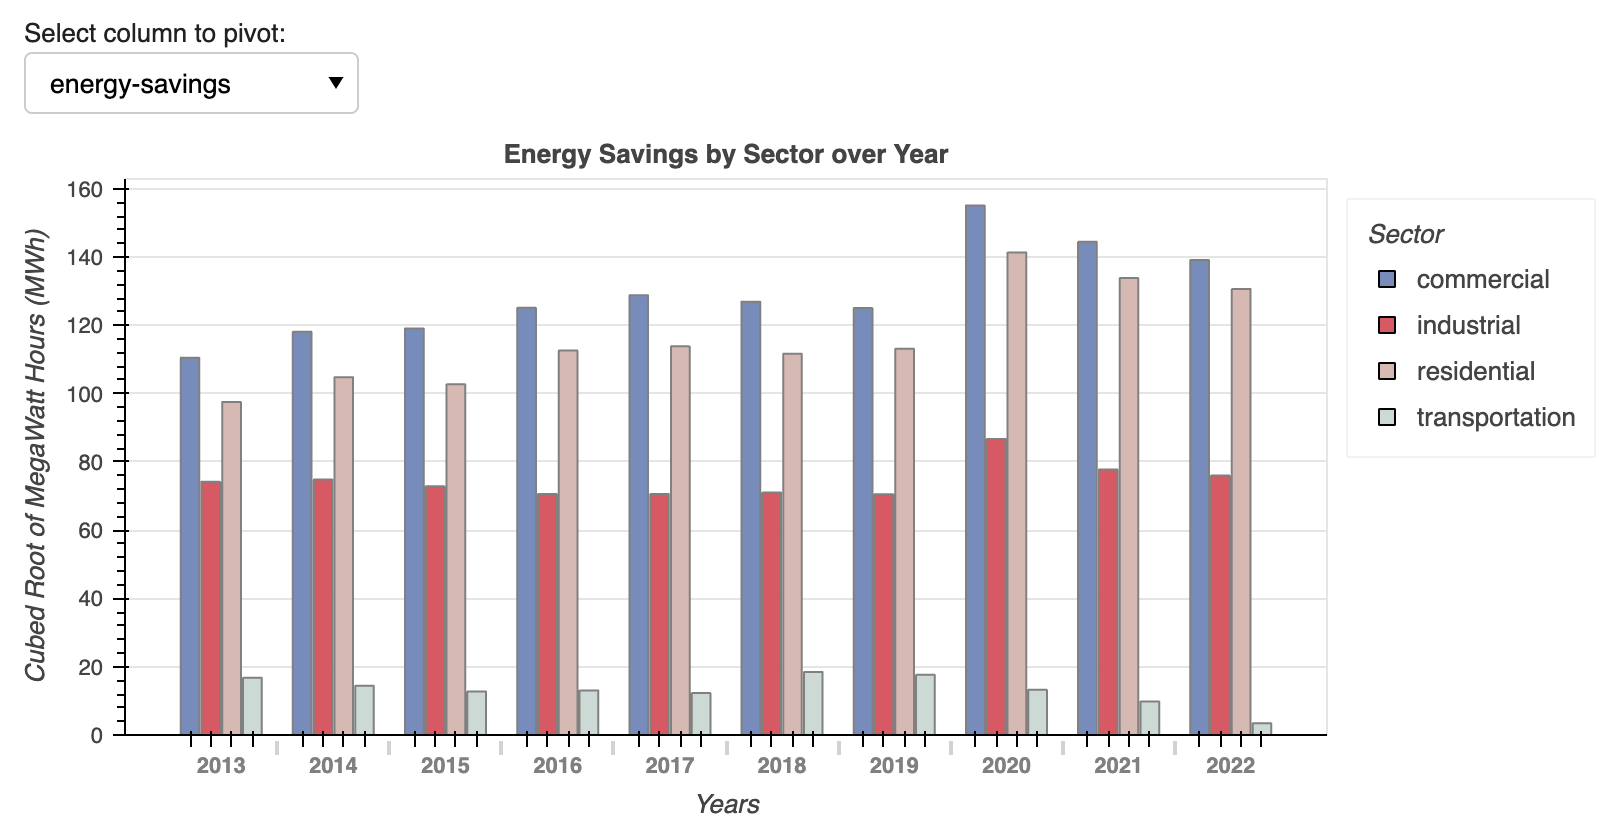
**Using Dropdown to switch columns:**
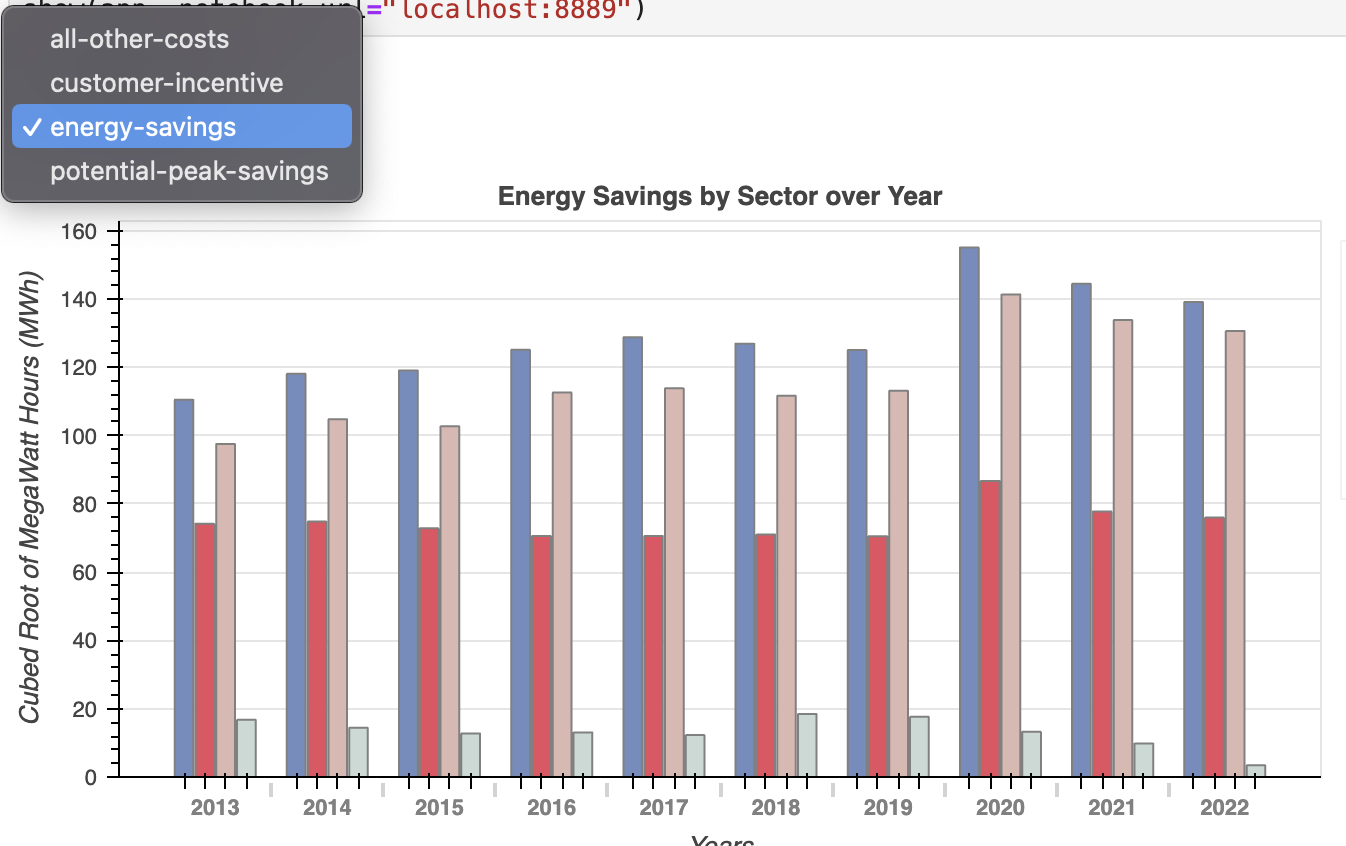
**Changed to 'customer-incentive' pivot:**
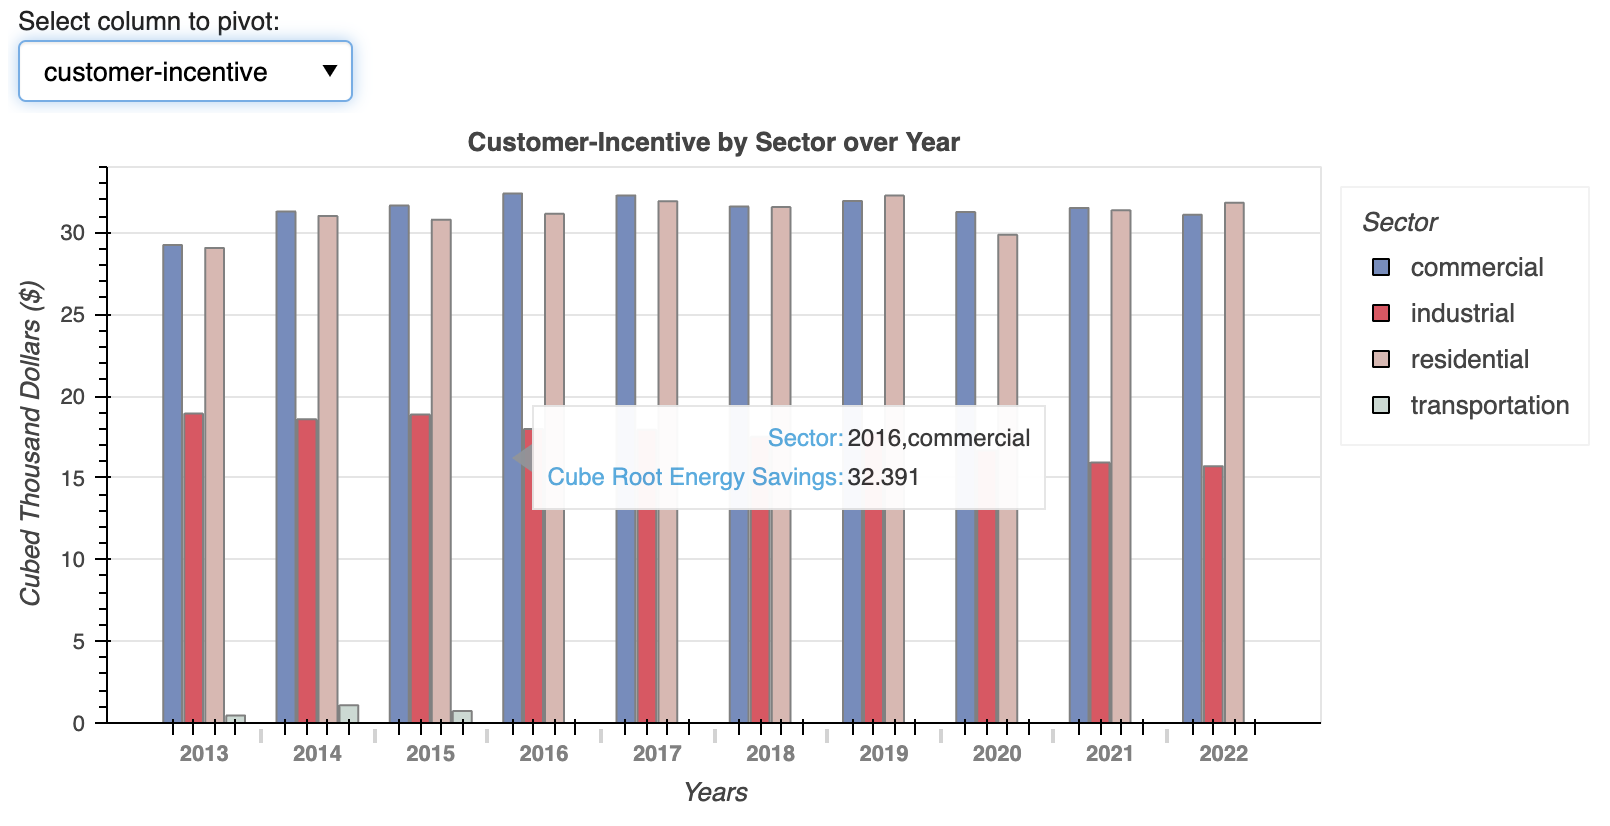

This dynamic bar plot demonstrates its real power: the ability to explore trends across multiple features within the dataset, all controlled by the user. We even changed the Y-axis Label to accomodate the different units for each feature.

This type of visualization is perfect for analytical websites or dashboards where you want to empower users to focus on the data they need, avoiding clutter and overwhelm. I hope this example makes the value of this approach clear!

## Chloropeth Maps

Moving on from line and bar charts, let's now employ a more interesting and complex powerful visualization technique known as a choropleth map. This thematic map will allow us to quickly uncover geographical patterns and hotspots of energy savings and customer incentives across the United States.

**Understanding Choropleth Maps**

A choropleth map is a type of thematic map where predefined geographic areas (countries, states, counties, etc.) are shaded or patterned according to a statistical variable. The colors or patterns represent different value ranges, enabling viewers to quickly grasp the distribution of the variable of interest across a region.

### Benefits of Choropleth Maps

1. **Spotting Geographic Patterns:** Choropleth maps make it easy to identify 'hot spots' and 'cold spots' of a variable across a region.

2. **Understanding Spatial Relationships:** They reveal how variables might be influenced by location, highlighting potential correlations.

3. **Communicating Data Effectively:** Choropleth maps can make complex data more accessible and understandable for general audiences than just tabular data

**The Plan**

Instead of exploring data over time, lets explore the average percentage change over two different columns of data over the entire time period. The strength of the geographical map is that we want initially spot states in the US that have extreme highs and lows (rather than comprehending in table format). We can even put two maps side by side and see quickly with an eye test if there appears to be a correlation or association between the two variables (this is not definitive but could be considered an indicator that should be given further exploration)

In [149]:
# For customer-incentive column

# we will pivot by customize incentive values
incentives_per_state = states_df.pivot_table(values='customer-incentive', index = 'state', columns='period', aggfunc='sum')
# Calculate the mean of the percentage changes for each state
avg_incentive_change_per_state = incentives_per_state.replace(0, 0.0001).pct_change(axis=1).mean(axis=1) * 100
avg_incentive_change_per_state.name = 'avg_pct_change'
avg_incentive_change_per_state.head(3)

state
AK   -11.111099
AL    -9.159785
AR    -2.203910
Name: avg_pct_change, dtype: float64

In [150]:
# Calculate the year-over-year percentage change for each state
energy_savings_per_state = states_df.pivot_table(values='energy-savings', index = 'state', columns='period', aggfunc='sum')
energy_savings_pct_change = energy_savings_per_state.pct_change(axis=1)
# Calculate the mean of the percentage changes for each state
avg_pct_change_per_state = energy_savings_pct_change.mean(axis=1) * 100
avg_pct_change_per_state.name = 'avg_pct_change'
avg_pct_change_per_state.head(3)

state
AK   -21.440381
AL    -5.895539
AR     2.190897
Name: avg_pct_change, dtype: float64

**Mapping Our Data with Bokeh**

Bokeh doesn't have a built-in chloropleth function, but that doesn't limit its power! We'll use the versatile `patches()` renderer to create our own polygon shapes. This approach offers more customization than some out-of-the-box solutions, letting us tailor the visualization perfectly.

**Getting the Geographic Data**

I found a US GeoJSON file from PublicaMundi's GitHub (link here: [https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json](https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json)). This will give us the state shapes we need.  

**Preparing and Merging**

I loaded the GeoJSON into a GeoDataFrame (using the GeoPandas library), then adjusted Alaska and Hawaii's positions for a more compact map. Finally, I merged this geographic data with the percentages we calculated.

**The Magic of `patches()`**

With everything in place, the `patches()` function will draw our beautiful chloropleth map, complete with a color gradient reflecting the data!

**Note:** Again don't worry too much about the shift_scale_geometries() and create_gdf() functions, but more on the creation of the chloropleth map. My goal is to show that even if a specific visualization is not built into bokeh, we can use our own creativity combined with the customization available in Bokeh to create our own unique visualizations!

In [151]:
import geopandas as gpd

def shift_scale_geometries(gdf, state_name, scale_factor, shift_x, shift_y):
    # Select the state's geometry
    state_geom = gdf.loc[gdf['name'] == state_name, 'geometry']

    # Scale and then translate the geometry
    new_geom = state_geom.scale(xfact=scale_factor, yfact=scale_factor).translate(xoff=shift_x, yoff=shift_y)

    # Assign the transformed geometry back
    gdf.loc[gdf['name'] == state_name, 'geometry'] = new_geom

def create_gdf(series, geo_json_file = 'us-states.json'):
    gdf = gpd.read_file(geo_json_file)
    # Parameters for scaling and translating Alaska and Hawaii
    alaska_scale = 0.5
    alaska_shift_x = -37
    alaska_shift_y = -38
    
    hawaii_scale = 2
    hawaii_shift_x = 65
    hawaii_shift_y = 0
    
    # Apply the transformation to Alaska and Hawaii
    shift_scale_geometries(gdf, 'Alaska', alaska_scale, alaska_shift_x, alaska_shift_y)
    shift_scale_geometries(gdf, 'Hawaii', hawaii_scale, hawaii_shift_x, hawaii_shift_y)

    # Merge your average percentage change data with the GeoDataFrame
    gdf = gdf.merge(series, how='left', left_on='id', right_index=True)

    return gdf

In [152]:
def create_choropleth_map(gdf, title, low_color_val, high_color_val, tooltip_data):
    """
    Creates a choropleth map using Bokeh.

    Parameters:
    - gdf: GeoDataFrame to be used for plotting.
    - title: Title of the plot.
    - low_color_val: The lowest value for the color scale.
    - high_color_val: The highest value for the color scale.
    - tooltip_data: List of tuples for hover tool. Each tuple should contain ('Label', '@column_name').
    """

    # Convert GeoDataFrame to GeoJSON format
    geo_source = GeoJSONDataSource(geojson=gdf.to_json())

    # Create a color mapper with a specified palette
    color_mapper = LinearColorMapper(palette="Viridis256", low=low_color_val, high=high_color_val)

    # Create the figure
    p = figure(title=title, height=600, width=900, toolbar_location='below', tools="pan, wheel_zoom, box_zoom, reset,save")
    p.x_range = Range1d(start=-130, end=-65)  # Adjust the start and end values as needed

    # Remove axes and gridlines
    p.axis.visible = False
    p.grid.visible = False
    # format and center the title
    p.title.align = 'center'
    p.title.text_font_size = '12pt'

    p.patches('xs', 'ys', source=geo_source,
              fill_color={'field': 'avg_pct_change', 'transform': color_mapper},
              line_color='black', line_width=0.50, fill_alpha=1)

    # Create the hover tool
    hover = HoverTool(tooltips=tooltip_data)

    # Add the hover tool to the figure
    p.add_tools(hover)

    # Create a color bar with the color mapper
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Avg. % Change')
    p.add_layout(color_bar, 'right')

    # Display the figure
    show(p)

Let's now plot and visualize these two maps! You can see immediately the extremes highs and lows immmediately by distinguishing by the divering color palette I chose.

In [153]:
energy_gdf = create_gdf(avg_pct_change_per_state)
tooltip_data_energy = [("State", "@name"), ("Avg. % Change", "@avg_pct_change")]
create_choropleth_map(energy_gdf, 'Average Percentage Change of Energy Savings by State from 2013 - 2022', -25., 50., tooltip_data_energy)

incentive_gdf = create_gdf(avg_incentive_change_per_state)
tooltip_data_incentive = [("State", "@name"), ("Avg. % Change", "@avg_pct_change")]
create_choropleth_map(incentive_gdf, 'Average Percentage Change of Customer Incentives by State from 2013 - 2022', -20., 50., tooltip_data_incentive)

**The Two Maps**

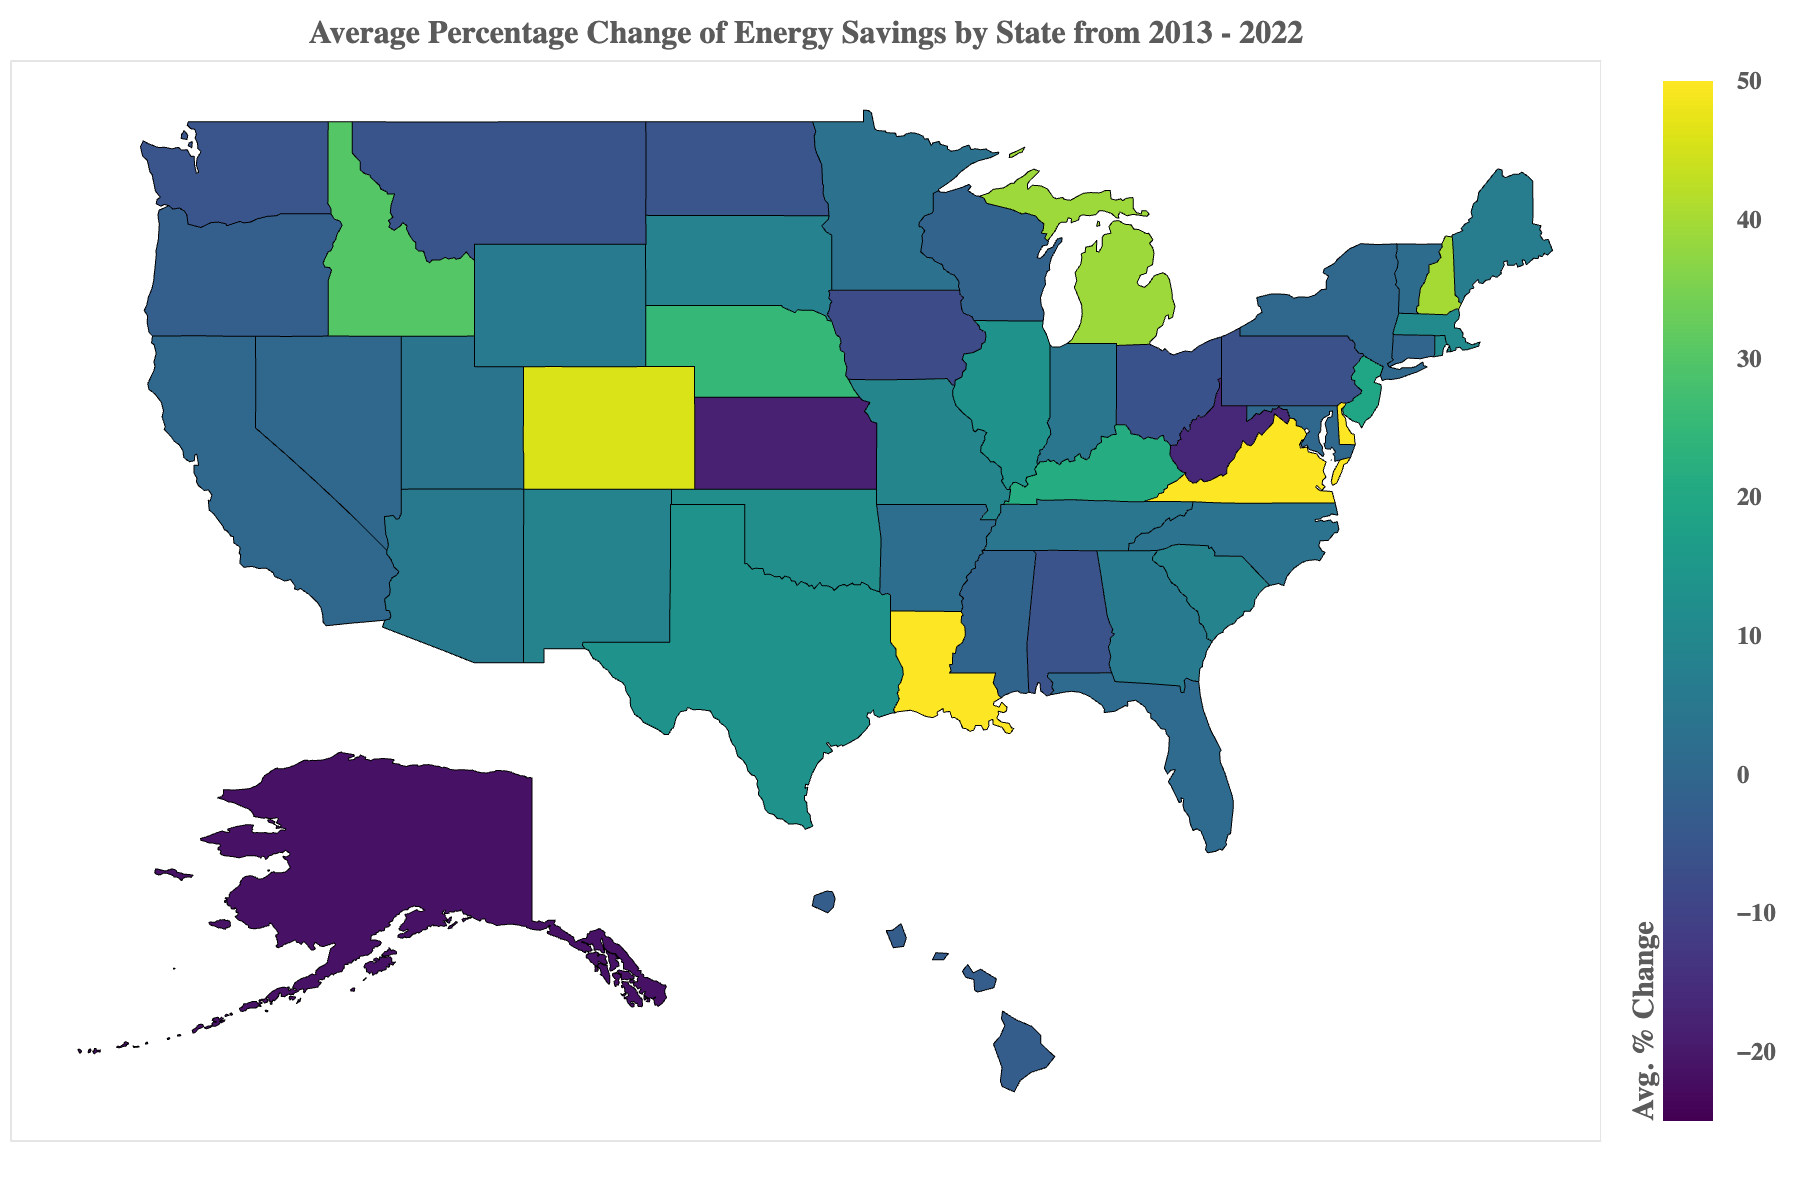

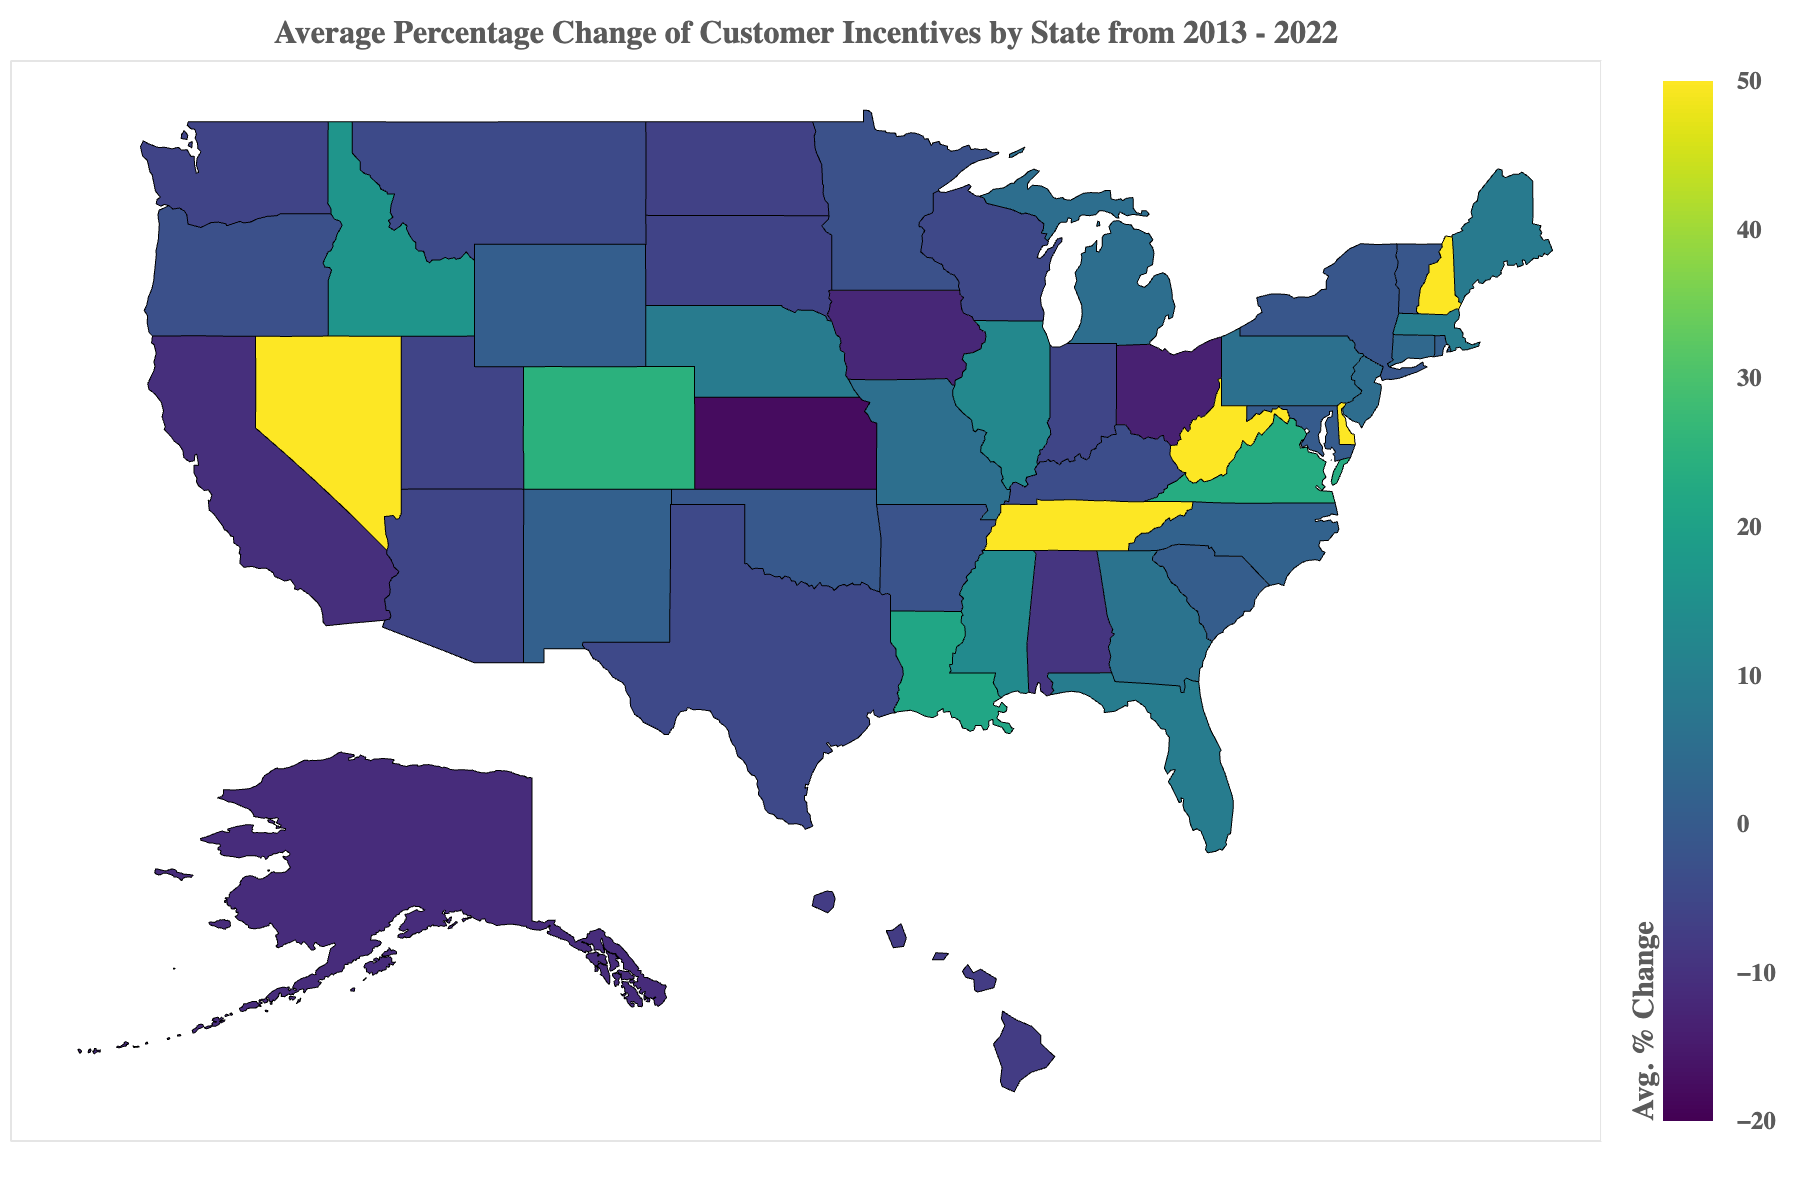

**Potential Limitations:**

It's important to note that we haven't normalized the data for factors like GDP or population.  These could offer additional context and increase the accuracy of direct comparisons between states, but since our current focus is on broad state-level trends, this analysis still provides valuable insights.

**Next Steps: Your Turn!**

Imagine a single dynamic figure where you can switch between any data feature to explore its percent change over time.  This would be a fantastic way to practice your Bokeh skills!  I encourage you to try building this visualization on your own – it's a great way to solidify the concepts you've learned.

# Conclusion

Through this notebook, we've embarked on a journey to explore the power of interactive visualizations using the Bokeh library to uncover insights from energy savings data through trends, comparisons, and geographical patterns.

## Reflections

Line plots and area charts unveiled overall US energy savings progress over time, pointing to areas for potential improvement.  Interactive line plots facilitated comparisons across states, revealing regional variations and best practices. Bar charts dissected energy savings by sector, pinpointing key contributors and their impact, guiding policy decisions for maximum efficiency. The multi-level bar chart further clarified these insights by showcasing sector-specific nuances over time.

Choropleth maps, powered by the integration of GeoJSON and Bokeh, offered a compelling visual analysis of geographical patterns in energy savings and incentives.  These maps highlight regional disparities, enabling targeted interventions and resource allocation.

Crucially, Bokeh's interactivity transformed these visualizations into dynamic exploration tools. Zooming, panning, hovering, and data selection allowed users to dive deeper, revealing insights easily missed in static representations. This empowered users to ask questions, test hypotheses, and achieve a truly comprehensive understanding of the energy savings landscape.

## Future Directions

The insights gained through these visualizations open up exciting avenues for further exploration and analysis. We could potentially incorporate additional datasets, such as demographic, economic, or environmental factors, to uncover correlations and drivers of energy savings. By integrating these datasets, we can develop a more holistic understanding of the factors influencing energy efficiency and inform more targeted policy interventions. Another direction could be to expand the geographical scope of the analysis to include international data, allowing us to compare energy savings trends and practices across different countries. This could lead to identifying global best practices and fostering international collaboration in pursuit of energy efficiency.

Moreover, the visualization techniques demonstrated in this notebook have applications far beyond this specific dataset. We could use similar approaches to analyze renewable energy adoption, carbon emissions, or energy consumption patterns. By leveraging the power of interactive visualizations, we can uncover insights, communicate findings effectively, and drive data-driven decision-making across various sectors. Bokeh with it's powerful responsive features and integration in websites, is a great library for making these types of analytical dashboards!

**Final Remarks:**
I hoped I have shown you the power of the Bokeh Visualization toolkit and I hope you harness it in either your own notebooks or websites! Thank you for following along!


# References

- U.S. Energy Information Administration. Open Data. [Website](https://www.eia.gov/opendata/)
- Bokeh Documentation. [Website](https://docs.bokeh.org/en/latest/)
- GeoPandas Documentation. [Website](https://geopandas.org/)
- US GeoJSON File [Github](https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json)